<h1 align="center"  style=" color:#000; background-color:#3498db; padding:20px; font-family: 'Courier New', Courier, monospace;">
START-UP SUCCESS PREDICTION
</h1>


<h3 class="alert alert-success"  style="color:#000; font-family: 'Courier New', Courier, monospace;">
Group information: 
 <h4 style="color:#000; font-family: 'Courier New', Courier, monospace;">
     <b> Group number:</b><b> M <p> <br><br>
     <b> Student ID 1: 0285763 </b>Name: Bhavinkumar Jagdishbhai Patel
     , <br> <br><u>Contribution</u>: Business Understanding, Data Collection and Understanding, and Data Preparation <p><br/>
     <b> Student ID 1: 0281738 </b>Name: Renzo Vizarreta Figueroa
 , <br> <br><u>Contribution</u>: Feature Engineering ,Feature Selection and Data Splitting  <p><br/>
     <b> Student ID 1: 0262513 </b>Name: Athena Nove Dela Fuerta
 , <br> <br><u>Contribution</u>: Data Visualization and Model Assessment <p><br/>
     <b> Student ID 1: 0276904 </b>Name: Md Sahid Parvez
 , <br> <br><u>Contribution</u>:Model Selection and Training,Model Evaluation, and Predicting the Class of new Record <p><br/>
</h4>
</h3>

<h2 class="alert alert-success"  style="color:#000; font-family: 'Courier New', Courier, monospace;">
1. BUSINESS UNDERSTANDING
</h2>

<div class="alert alert-info" style="color:#000; font-size:15px;  line-height:1.5;font-family: 'Georgia', serif;">
A start-up is a company or project begun by an entrepreneur to seek, develop, and validate a scalable economic model. The goal is to forecast the outcome of startups that are currently in operation, determining whether they will achieve success or face failure. Success is defined as when a company's founders realize substantial financial gains through either a Merger and Acquisition (M&A) deal or an Initial Public Offering (IPO). Conversely, a company is deemed to have failed if it ends up shutting down.
</div>

<h4 class="alert alert-danger"  style="font-family: 'Courier New', Courier, monospace;">
Questions we are looking to answer through this project.
</h4>

<div class="alert alert-info" style=" color:#000; font-size:15px;  line-height:1.5;font-family: 'Georgia', serif;">
Primary Question: Which Status category (Success or Closed) will the Start-up fall based on realization of substantial financial gains.

Secondary Question: Does the success of a company depend solely on financial gain, or are there other contributing factors?

Within the context of Exploratory Data Analysis:

1. What is the distribution of Target variable "status"?
2. What are the patterns for relationships, avg_participants and milestones?
3. Does relationships, avg_participants and milestones have a relationship with status?
4. What kind of relation exists among has_angel, has_VC and status ?
</div>

<h2 class="alert alert-success"  style="color:#000; font-family: 'Courier New', Courier, monospace;">2. DATA COLLECTION AND UNDERSTANDING</h2>

<div class="alert alert-info" style="color:#000; font-size:15px;  line-height:1.5;font-family: 'Georgia', serif;">
The data is sourced from: <a href="https://www.kaggle.com/datasets/manishkc06/startup-success-prediction/data">Startup Success Prediction (Kaggle)</a>
. <br><br>The dataset includes industry trends, investment insights, and individual company information. The dataset is not clean as it contains some missing and mistyped values.<br><br>
There are 49 columns/features. Some of the features are:<br>
 <ul>
        <li><strong>age_first_funding_year:</strong> The age when a startup received its first funding.</li>
        <li><strong>relationships:</strong> The number of relationships or connections a startup has.</li>
        <li><strong>funding_rounds:</strong> The total number of funding rounds a startup has gone through.</li>
        <li><strong>funding_total_usd:</strong> The total amount of funding received by a startup in USD.</li>
        <li><strong>milestones:</strong> The number of significant achievements or milestones reached by a startup.</li>
        <li><strong>category_code:</strong> The industry or sector to which the startup belongs.</li>
        <li><strong>has_VC:</strong> Indicates whether the startup has received venture capital (VC) funding (Yes/No).</li>
        <li><strong>has_angel:</strong> Indicates whether the startup has received funding from angel investors (Yes/No).</li>
        <li><strong>has_roundA:</strong> Indicates whether the startup has completed a round A funding (Yes/No).</li>
        <li><strong>avg_participants:</strong> The average number of participants in the startup's funding rounds.</li>
        <li><strong>is_top500:</strong> Indicates whether the startup is ranked among the top 500 (Yes/No).</li>
        <li><strong>status (acquired/closed):</strong> The final outcome of the startup, whether it was 'acquired' or 'closed.'</li>
    </ul>
</div>

 <h4 class="alert alert-danger" style="font-family: 'Courier New', Courier, monospace;">LIBRARIES USED</h4>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.preprocessing import RobustScaler, MinMaxScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
import warnings

In [2]:
df=pd.read_csv("startup_data.csv")

In [3]:
#Check the first 5 records
df.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,...,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,...,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,...,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,...,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,...,c:65806,1,1,0,0,0,0,1.0000,1,closed


In [4]:
#Check the last 5 records
df.tail(5)

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
918,352,CA,37.740594,-122.376471,94107,c:21343,San Francisco,NaN,CoTweet,1,...,c:21343,0,0,1,0,0,0,6.0000,1,acquired
919,721,MA,42.504817,-71.195611,1803,c:41747,Burlington,Burlington MA 1803,Reef Point Systems,0,...,c:41747,1,0,0,1,0,0,2.6667,1,closed
920,557,CA,37.408261,-122.015920,94089,c:31549,Sunnyvale,NaN,Paracor Medical,0,...,c:31549,0,0,0,0,0,1,8.0000,1,closed
921,589,CA,37.556732,-122.288378,94404,c:33198,San Francisco,NaN,Causata,1,...,c:33198,0,0,1,1,0,0,1.0000,1,acquired
922,462,CA,37.386778,-121.966277,95054,c:26702,Santa Clara,Santa Clara CA 95054,Asempra Technologies,1,...,c:26702,0,0,0,1,0,0,3.0000,1,acquired


In [5]:
#Check some random records
df.sample(3)

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
834,283,CA,37.555962,-122.288006,94404,c:17738,San Mateo,NaN,M-Factor,1,...,c:17738,1,0,0,0,1,0,3.0,1,acquired
410,824,CA,34.054935,-118.244476,90032,c:47115,Los Angeles,Los Angeles CA 90032,Giiv,0,...,c:47115,0,1,1,0,0,0,2.5,1,closed
584,1017,MA,42.358956,-71.054776,2109,c:6964,Boston,NaN,Swaptree Inc.,0,...,c:6964,1,0,0,1,1,0,1.0,1,closed


In [6]:
# Check datatype of each column
df.dtypes

Unnamed: 0                    int64
state_code                   object
latitude                    float64
longitude                   float64
zip_code                     object
id                           object
city                         object
Unnamed: 6                   object
name                         object
labels                        int64
founded_at                   object
closed_at                    object
first_funding_at             object
last_funding_at              object
age_first_funding_year      float64
age_last_funding_year       float64
age_first_milestone_year    float64
age_last_milestone_year     float64
relationships                 int64
funding_rounds                int64
funding_total_usd             int64
milestones                    int64
state_code.1                 object
is_CA                         int64
is_NY                         int64
is_MA                         int64
is_TX                         int64
is_otherstate               

<div class="alert alert-warning" style="color:#000; font-size:15px;  line-height:1.5;font-family: 'Georgia', serif;">
<u>Interpretation:</u><br>
Out of 49 features - 25 Features are stored as object, which typically represent string or categorical data. 24 Features are stored as numeric variables.
</div>

In [7]:
#Number of rows and columns
df.shape

(923, 49)

<div class="alert alert-warning" style="color:#000; font-size:15px;  line-height:1.5;font-family: 'Georgia', serif";>
<u>Interpretation:</u><br>
The startup dataset has 923 rows and 49 columns/features as seen the in the above output
</div>

In [8]:
#Summary of the dataset
df.describe()

,Unnamed: 0,latitude,longitude,labels,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,...,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500
count,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,771.000000,771.000000,923.000000,923.000000,...,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000
mean,572.297941,38.517442,-103.539212,0.646804,2.235630,3.931456,3.055353,4.754423,7.710726,2.310943,...,0.003250,0.322860,0.326111,0.254605,0.508126,0.392199,0.232936,0.099675,2.838586,0.809317
std,333.585431,3.741497,22.394167,0.478222,2.510449,2.967910,2.977057,3.212107,7.265776,1.390922,...,0.056949,0.467823,0.469042,0.435875,0.500205,0.488505,0.422931,0.299729,1.874601,0.393052
min,1.000000,25.752358,-122.756956,0.000000,-9.046600,-9.046600,-14.169900,-7.005500,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,283.500000,37.388869,-122.198732,0.000000,0.576700,1.669850,1.000000,2.411000,3.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.500000,1.000000
50%,577.000000,37.779281,-118.374037,1.000000,1.446600,3.528800,2.520500,4.476700,5.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.500000,1.000000
75%,866.500000,40.730646,-77.214731,1.000000,3.575350,5.560250,4.686300,6.753400,10.000000,3.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,3.800000,1.000000
max,1153.000000,59.335232,18.057121,1.000000,21.895900,21.895900,24.684900,24.684900,63.000000,10.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,16.000000,1.000000


<div class="alert alert-warning" style="color:#000; font-size:15px;  line-height:1.5;font-family: 'Georgia', serif;">
<u>Interpretation:</u><br>
The table provides a summary of descriptive statistics for 24 numeric features, including count, mean, standard deviation, minimum, maximum, and quartiles. Notably, the "relationships" variable ranges from 0 to 63 years, "funding_rounds" spans from 1 to 10, and "milestones" ranges from 0 to 8. The remaining numeric variables exhibit distinct ranges.
</div>

 <h4 class="alert alert-danger" style="font-size:15px;  line-height:1.5;font-family: 'Courier New', Courier, monospace;">Elimination of Columns</div>

In [9]:
columns_to_drop = ['Unnamed: 0','Unnamed: 6','latitude','longitude','zip_code','id','object_id','is_CA', 'is_NY', 'is_MA', 'is_TX', 'is_otherstate','is_software', 'is_web', 'is_mobile', 'is_enterprise', 'is_advertising', 'is_gamesvideo', 'is_ecommerce', 'is_biotech', 'is_consulting', 'is_othercategory','first_funding_at','last_funding_at','name']
df.drop(columns_to_drop,axis=1,inplace=True)

<div class="alert alert-warning" style="color:#000; font-size:15px;  line-height:1.5;font-family: 'Georgia', serif;">
<u>Interpretation</u>:<br><br>
Upon inspection, it was discovered that the 'Unnamed: 0' column contains arbitrary numbers, and the column name itself lacks a meaningful interpretation. Consequently, this column has been removed from the DataFrame.<br><br>
The 'Unnamed: 6' column is essentially a combination of the 'city', 'state_code', and 'zip_code' columns, so it has been eliminated from the DataFrame.<br><br>
We will use the company's address information, which includes the 'city,' and 'state_code,' for location details. As a result, we have decided to remove the 'latitude', 'longitude' and 'zip_code' columns, as they are no longer needed.<br><br>
The 'id' column contains unique identifiers for each row (e.g., a unique ID or a primary key), it may not provide meaningful information for our analysis. Hence, we dropped the column. For the same reason we dropped 'object_id' column.<br><br>
We removed columns 'is_CA', 'is_NY', 'is_MA', 'is_TX', 'is_otherstate' because the state information is already captured in the 'state' column. Similarly, we eliminated columns 'is_software', 'is_web', 'is_mobile', 'is_enterprise', 'is_advertising', 'is_gamesvideo', 'is_ecommerce', 'is_biotech', 'is_consulting', and 'is_othercategory' as the category information is already contained in the 'category_code' column.<br><br>
We excluded the "name" column from our dataframe as it is unlikely to contribute to the accuracy of predicting a company's success or failure<br><br>
</div>

 <h4 class="alert alert-danger" style="font-size:15px;  line-height:1.5;font-family: 'Courier New', Courier, monospace;"> Comparing the values of columns 'state_code' and 'state_code.1'</h4>

In [10]:
comparison = df['state_code'] == df['state_code.1']
mismatched_rows = df[~comparison]
df.drop('state_code.1',axis=1,inplace=True)
mismatched_rows

,state_code,city,labels,founded_at,closed_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,...,category_code,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
515,CA,Menlo Park,0,1/1/2005,9/1/2010,2.1616,3.2877,3.4986,7.6904,13,...,search,0,0,1,1,0,0,2.5,1,closed


<div class="alert alert-warning" style="color:#000; font-size:15px;  line-height:1.5;font-family: 'Georgia', serif;">
<u>Interpretation</u>:<br>
We compared two columns whether they contain same data.
There is only one discrepancy, which appears to be a typing error. Both the 'state_code' and 'state_code.1' columns contain identical values. As a result, we can safely remove the 'state_code.1' column.
</div>

 <h4 class="alert alert-danger" style="font-size:15px;  line-height:1.5;font-family: 'Courier New', Courier, monospace;"> 
    Transformation of 'status' column</h4>

<div class="alert alert-info" style="color:#000; font-size:15px;  line-height:1.5;font-family: 'Georgia', serif;">
We performed the following value transformations in the 'status' column:<br>
Changed 'acquired' to 1<br>
Changed 'closed' to 0<br>
This adjustment will make it easier to work with and analyze the 'status' column in our dataset. After converting we can compare
columns 'labels' ansd 'status'.<br>
</div>

In [11]:
df['status'] = df['status'].replace({'closed': 0, 'acquired': 1})
df['status'] = df['status'].astype(int)

 <h4 class="alert alert-danger" style="font-size:15px;  line-height:1.5;font-family: 'Courier New', Courier, monospace;"> Comparing the values of columns 'status' and 'labels'</h4>

In [12]:
comparison = df['status'] == df['labels']
mismatched_rows = df[~comparison]
df.drop('labels',axis=1,inplace=True)
mismatched_rows

,state_code,city,labels,founded_at,closed_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,...,category_code,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status


<div class="alert alert-warning" style="color:#000; font-size:15px;  line-height:1.5;font-family: 'Georgia', serif;">
    <u>Interpretation</u>:<br>
    We compared the values of the columns 'status' and 'labels'.
    Since the values in both columns are identical, we have removed the 'labels' column.
</div>

In [13]:
df['category_code'].unique()

array(['music', 'enterprise', 'web', 'software', 'games_video',
       'network_hosting', 'finance', 'mobile', 'education',
       'public_relations', 'security', 'other', 'photo_video', 'hardware',
       'ecommerce', 'advertising', 'travel', 'fashion', 'analytics',
       'consulting', 'biotech', 'cleantech', 'search', 'semiconductor',
       'social', 'medical', 'automotive', 'messaging', 'manufacturing',
       'hospitality', 'news', 'transportation', 'sports', 'real_estate',
       'health'], dtype=object)

<div class="alert alert-warning" style="color:#000; font-size:15px;  line-height:1.5;font-family: 'Georgia', serif;">
   <u>Interpretation</u>:<br>
    We checked all unique values in the 'category_code' and found no typos. For example, 'news' is correctly spelled, and there are no instances of 'nesw'
</div>
  

In [14]:
#Identifying and Removing duplicate rows
duplicates = df.duplicated(keep=False)
duplicated_rows = df[duplicates]
duplicated_rows
df.drop_duplicates(inplace=True) 

<div class="alert alert-warning" style="color:#000; font-size:15px;  line-height:1.5;font-family: 'Georgia', serif;">
   <u>Interpretation</u>:<br>
    We observed that there are two rows which are duplicates of each other, so we removed one record, keeping the other.
</div>

In [15]:
df.shape

(922, 22)

<div class="alert alert-warning" style="color:#000; font-size:15px;  line-height:1.5;font-family: 'Georgia', serif;">
 <u>Interpretation</u>:<br>
Before removing the irrelevant columns and duplicated rows, the DataFrame contained 923 rows and 49 columns. After the removal of irrelevant columns and rows, the DataFrame now contains 922 rows and 20 columns.
</div>

<h2 class="alert alert-success"  style="color:#000; font-family: 'Courier New', Courier, monospace;">3. DATA PREPARATION AND  VISUALIZATION</h2>

<div class="alert alert-info" style="color:#000; font-size:15px;  line-height:1.5;font-family: 'Georgia', serif;">
In predictive analytics, effective Data Preparation involves cleaning, transforming, and organizing raw data to ensure its suitability for analysis. This includes addressing issues like missing values and outliers, employing imputation methods, and optimizing the dataset through feature engineering, standardization, and normalization. <br><br>
    Visualization refers to graphical representations of data, such as histograms, scatter plots, and correlation matrices, aid in uncovering patterns, relationships, and potential insights within the dataset. 
    Visualization tools, such as histograms and scatter plots, play a crucial role in exploring patterns, relationships, and insights within the dataset. They aid in feature selection, model interpretation, and decision-making related to class imbalances and multicollinearity, contributing to the development of accurate predictive models.</div>

 <h4 class="alert alert-danger" style="font-size:15px;  line-height:1.5;font-family: 'Georgia', serif;">Handling Null values</h4>

In [16]:
df.isnull().sum()

state_code                    0
city                          0
founded_at                    0
closed_at                   587
age_first_funding_year        0
age_last_funding_year         0
age_first_milestone_year    152
age_last_milestone_year     152
relationships                 0
funding_rounds                0
funding_total_usd             0
milestones                    0
category_code                 0
has_VC                        0
has_angel                     0
has_roundA                    0
has_roundB                    0
has_roundC                    0
has_roundD                    0
avg_participants              0
is_top500                     0
status                        0
dtype: int64

In [17]:
#Converted into panda datetime
df['founded_at'] = pd.to_datetime(df['founded_at'])
df['closed_at'] = pd.to_datetime(df['closed_at'])


mean_value1=df['age_first_milestone_year'].mean()
mean_value2=df['age_last_milestone_year'].mean()
mean_value3=df['closed_at'].mean()
df['age_first_milestone_year'].fillna(mean_value1,inplace=True)
df['age_last_milestone_year'].fillna(mean_value2,inplace=True)
df['closed_at'].fillna(mean_value3,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 922 entries, 0 to 922
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   state_code                922 non-null    object        
 1   city                      922 non-null    object        
 2   founded_at                922 non-null    datetime64[ns]
 3   closed_at                 922 non-null    datetime64[ns]
 4   age_first_funding_year    922 non-null    float64       
 5   age_last_funding_year     922 non-null    float64       
 6   age_first_milestone_year  922 non-null    float64       
 7   age_last_milestone_year   922 non-null    float64       
 8   relationships             922 non-null    int64         
 9   funding_rounds            922 non-null    int64         
 10  funding_total_usd         922 non-null    int64         
 11  milestones                922 non-null    int64         
 12  category_code         

<div class="alert alert-warning" style="color:#000; font-size:15px;  line-height:1.5;font-family: 'Georgia', serif;">
<u>Interpretation</u>:<br>
We have identified that the columns 'age_first_milestone_year', 'age_last_milestone_year' and 'closed_at' contain null values. To handle the null values in 'age_first_milestone_year', 'age_last_milestone_year'and 'closed_at' we will replace them with their mean value.
</div>

 <h4 class="alert alert-danger" style="font-size:15px;  line-height:1.5;font-family: 'Georgia', serif;">Checking and Deleting columns for Negative ages.</h4>

In [18]:
df.sort_values(by='age_first_funding_year', ascending=True).head()

,state_code,city,founded_at,closed_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,...,category_code,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
558,NY,New York,2013-04-16,2009-05-04,-9.0466,-9.0466,-6.046600,-3.882200,6,1,...,advertising,0,1,0,0,0,0,1.0,0,0
584,MA,Boston,2010-01-01,2013-05-01,-3.5068,0.3945,-0.937000,0.084900,5,3,...,web,1,0,0,1,1,0,1.0,1,0
263,UT,Salt Lake City,2007-01-01,2012-07-19,-1.9863,-1.9863,3.055706,4.755399,3,1,...,other,1,0,0,0,0,0,1.0,0,0
431,CA,Beverly Hills,2010-08-01,2013-06-01,-1.4712,-0.1370,3.055706,4.755399,0,4,...,web,0,1,0,0,0,0,1.0,0,0
489,CA,Palo Alto,2007-07-07,2012-11-11,-1.1836,-1.1836,0.830100,0.830100,1,1,...,web,0,0,0,0,0,0,1.0,0,0


<div class="alert alert-warning" style="color:#000; font-size:15px;  line-height:1.5;font-family: 'Georgia', serif;">
<u>Interpretation</u>:<br>
We have observed the presence of negative values in the columns related to age, such as "age_first_funding_year," "age_last_funding_year," "age_first_milestone_year," and "age_last_milestone_year." 
</div>

In [19]:
# Get the absolute value of columns including negative value
df["age_first_funding_year"]=np.abs(df["age_first_funding_year"])
df["age_last_funding_year"]=np.abs(df["age_last_funding_year"])
df["age_first_milestone_year"]=np.abs(df["age_first_milestone_year"])
df["age_last_milestone_year"]=np.abs(df["age_last_milestone_year"])

<div class="alert alert-warning" style="color:#000; font-size:15px;  line-height:1.5;font-family: 'Georgia', serif;">
<u>Interpretation</u>:<br>
It is crucial to emphasize that ages cannot have negative values. Therefore, we have implemented a corrective measure by taking the absolute value of the rows where negative ages are recorded. This data cleaning procedure is implemented to maintain the integrity and reliability of the dataset.
    </div>

 <h4 class="alert alert-danger" style="font-size:15px;  line-height:1.5;font-family: 'Georgia', serif;">Checking the columns for negative ages once again</h4>

In [20]:
cs=df['age_first_funding_year'].sort_values()
cs.head(10)

469    0.0
72     0.0
765    0.0
33     0.0
207    0.0
201    0.0
787    0.0
525    0.0
39     0.0
40     0.0
Name: age_first_funding_year, dtype: float64

In [21]:
cs=df['age_last_funding_year'].sort_values()
cs.head(10)

336    0.0
300    0.0
842    0.0
283    0.0
748    0.0
249    0.0
223    0.0
840    0.0
207    0.0
201    0.0
Name: age_last_funding_year, dtype: float64

In [22]:
cs=df['age_first_milestone_year'].sort_values()
cs.head(10)

622    0.0
389    0.0
445    0.0
682    0.0
316    0.0
758    0.0
35     0.0
698    0.0
120    0.0
406    0.0
Name: age_first_milestone_year, dtype: float64

In [23]:
cs=df['age_last_milestone_year'].sort_values()
cs.head(10)

167    0.0
787    0.0
97     0.0
827    0.0
445    0.0
527    0.0
531    0.0
406    0.0
715    0.0
35     0.0
Name: age_last_milestone_year, dtype: float64

<div class="alert alert-warning" style="color:#000; font-size:15px;  line-height:1.5;font-family: 'Georgia', serif;">
<u>Interpretation</u>:<br>
All values in the columns 'age_first_funding_year,' 'age_last_funding_year,' 'age_first_milestone_year,' and 'age_last_milestone_year' are non-negative, indicating that there are no negative ages in these columns.
</div>

 <h4 class="alert alert-danger" style="font-size:15px;  line-height:1.5;font-family: 'Georgia', serif;">Identying and checking the counts for the Target Variable - "status"</h4>

In [24]:
df['status'].value_counts()

1    596
0    326
Name: status, dtype: int64

<div class="alert alert-warning" style="color:#000; font-size:15px;  line-height:1.5;font-family: 'Georgia', serif;">
<u>Interpretation</u>:<br>
The 'status' column contains 596 instances with a value of '1' and 326 instances with a value of '0'.
</div>

 <h4 class="alert alert-danger" style="font-size:15px;  line-height:1.5;font-family: 'Georgia', serif;">Plotting the above values in a Bar Chart to understand the distribution of 'status' better</h4>

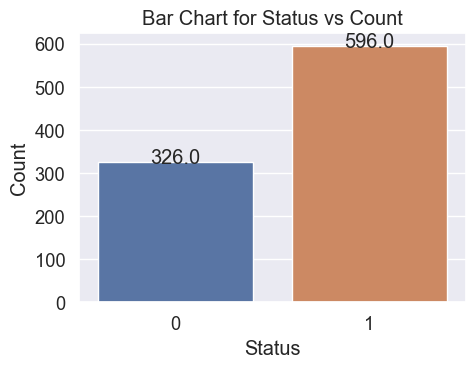

In [25]:
warnings.filterwarnings("ignore", category=UserWarning, module="seaborn")
sns.set_palette("Set2")
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize': (5, 3.5)}, font_scale=1.2)
ax=sns.countplot(x='status', data=df)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 2.5), textcoords='offset points')
plt.xlabel('Status')
plt.ylabel('Count')
plt.title('Bar Chart for Status vs Count')
plt.show()

 <h4 class="alert alert-danger" style="font-size:15px;  line-height:1.5;font-family: 'Georgia', serif;">Plotting the above values in a Pie Chart to understand the distribution of 'status' better</h4>

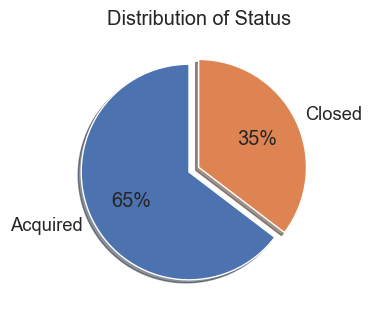

In [26]:
sns.set_palette("Set2")
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize': (5, 3.5)}, font_scale=1.2)
b = df['status'].value_counts()
dflevel = ["Acquired", "Closed"]
explode = (0.1, 0)
plt.pie(b, labels=dflevel, autopct='%.0f%%', startangle=90, explode=explode, shadow=True)
plt.title('Distribution of Status')
plt.show()

<div class="alert alert-warning" style="color:#000; font-size:15px;  line-height:1.5;font-family: 'Georgia', serif;">
<u>Interpretation</u>:<br>
In the startup dataset 65% of the records fall into the "Acquired" category and  35% fall into "Closed" category.
</div>

 <h4 class="alert alert-danger" style="font-size:15px;  line-height:1.5;font-family: 'Georgia', serif;"> Performing Univariate Analaysis</h4>

<div class="alert alert-info" style="color:#000; font-size:15px;  line-height:1.5;font-family: 'Georgia', serif;">
Univariate analysis is a statistical approach where we focus on just one variable at a time. The main purpose is to understand and summarize the features of that single variable.</div>

 <h6 class="alert alert-danger" style="font-size:15px;  line-height:1.5;font-family: 'Georgia', serif;">Visualization of relationships, milestones and avg_participants using Distribution Plot</h6>

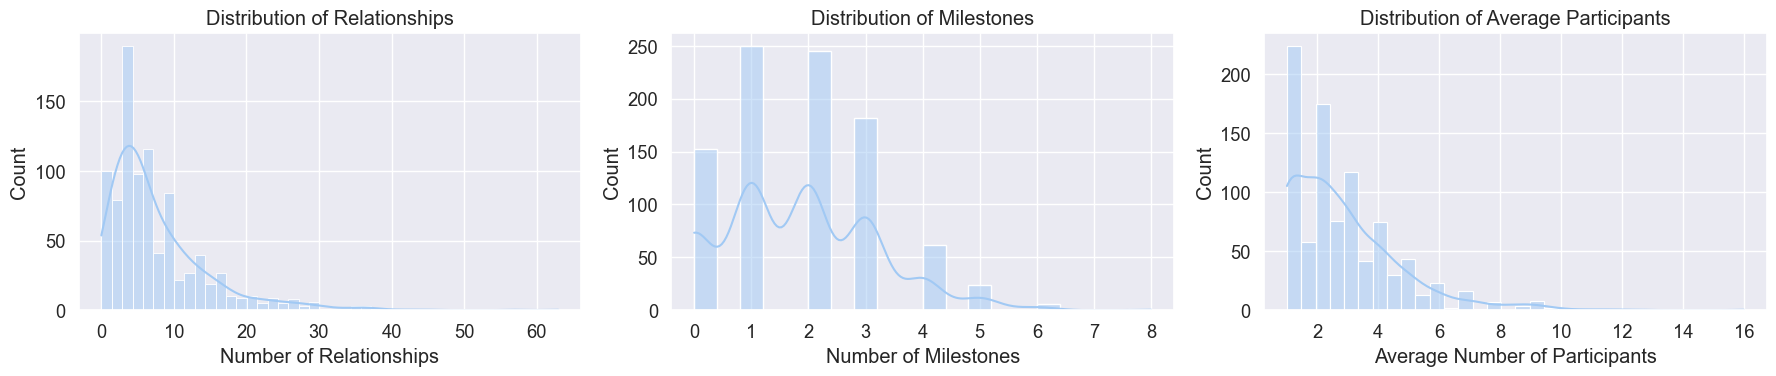

In [27]:
sns.set_palette("pastel")
plt.figure(figsize=(18, 4))
plt.subplot(1, 3, 1)
sns.histplot(df, x='relationships', kde=True)
plt.title('Distribution of Relationships')
plt.xlabel('Number of Relationships')

plt.subplot(1, 3, 2)
sns.histplot(df, x='milestones', kde=True)
plt.title('Distribution of Milestones')
plt.xlabel('Number of Milestones')

plt.subplot(1, 3, 3)
sns.histplot(df, x='avg_participants', kde=True)
plt.title('Distribution of Average Participants')
plt.xlabel('Average Number of Participants')

plt.tight_layout()
plt.show()

<div class="alert alert-warning" style="color:#000; font-size:15px;  line-height:1.5;font-family: 'Georgia', serif;">
<u>Interpretation</u>:<br>
Graph 1 reveals that the majority of startups have between 0 and 10 relationships. In Graph 2, it's evident that most startups have attained between 0 and 3 milestones. In Graph 3, we can see that the prevalent range for startups has an average participation of 1-2.5.
</div>

 <h6 class="alert alert-danger" style="font-size:15px;  line-height:1.5;font-family: 'Georgia', serif;">Visualization of Consumption of has_roundA, has_roundB, has_roundC and has_roundD</h6>

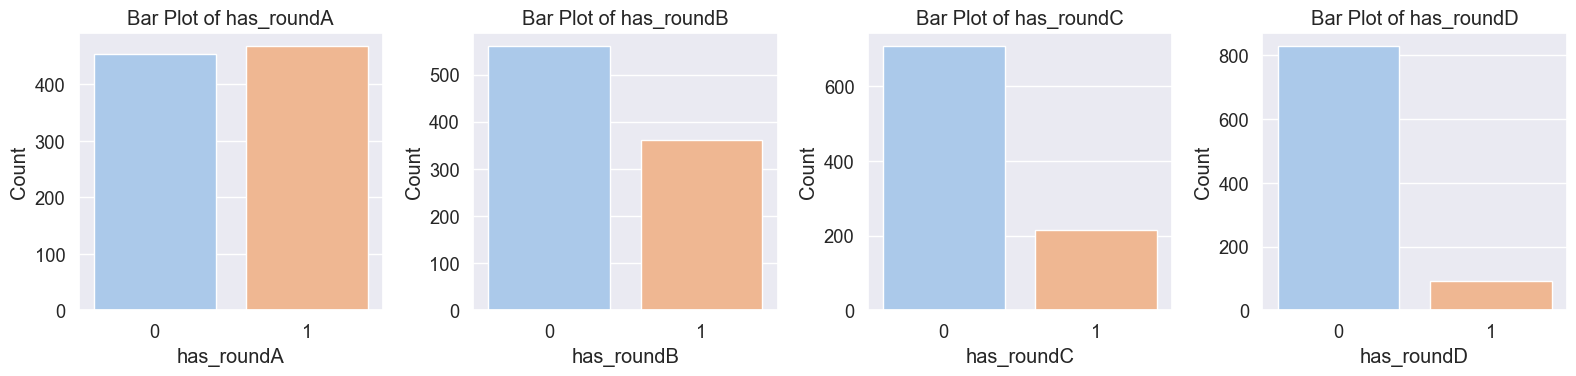

In [28]:
round_columns = ['has_roundA', 'has_roundB', 'has_roundC', 'has_roundD']
fig, axes = plt.subplots(1, len(round_columns), figsize=(16, 4))
for i, col in enumerate(round_columns):
    sns.countplot(data=df, x=col, ax=axes[i])
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].set_title(f'Bar Plot of {col}')
plt.tight_layout()
plt.show()

<div class="alert alert-warning" style="color:#000; font-size:15px;  line-height:1.5;font-family: 'Georgia', serif;">
<u>Interpretation</u>:<br>
The above graphs indicate that a majority of startups undergo funding rounds such as Round A and Round B, with a decreasing trend as subsequent rounds progress.
</div>

<h4 class="alert alert-danger" style="font-size:15px;  line-height:1.5;font-family: 'Georgia', serif;">
Comparison of different features (Bivariate)
</h4>

<div class="alert alert-info" style="color:#000; font-size:15px;  line-height:1.5;font-family: 'Georgia', serif;">
Bivariate analysis explores the interdependence between two variables, investigating how variations in one variable are linked to changes in another. By examining the association, correlation, or patterns between the two variables, bivariate analysis aims to uncover insights into their mutual relationship and potential influence on each other. </div>

<h6 class="alert alert-danger" style="font-size:15px;  line-height:1.5;font-family: 'Georgia', serif;">
Comparison of City vs funding_total_usd
</h6>

C:\Users\sahid\AppData\Local\Temp\ipykernel_9080\1660389630.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['funding_total_usd1']=df['funding_total_usd']/1000000


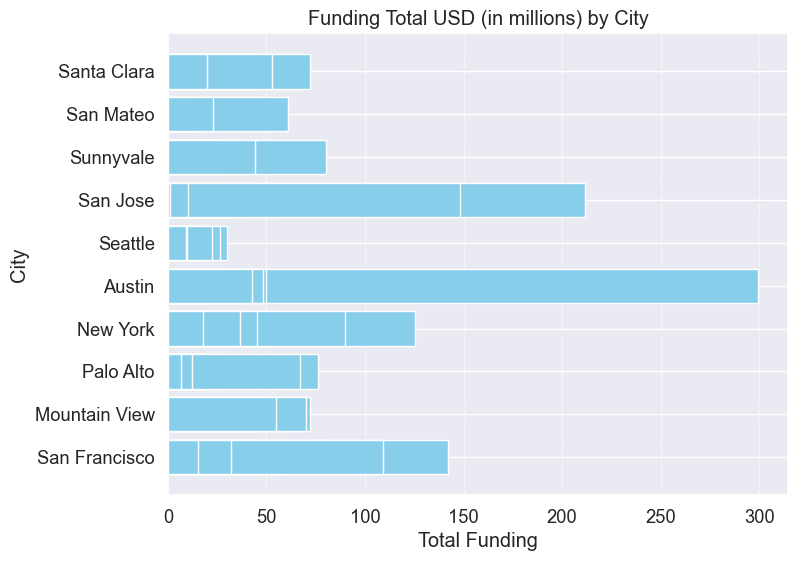

In [29]:
top_category_code = df['city'].value_counts().head(10).index.tolist()
filtered_df = df[df['city'].isin(top_category_code)]
filtered_df['funding_total_usd1']=df['funding_total_usd']/1000000

plt.figure(figsize=(8, 6))
bars=plt.barh(filtered_df['city'], filtered_df['funding_total_usd1'], color=['skyblue'])
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.xlabel('Total Funding')
plt.ylabel('City')
plt.title('Funding Total USD (in millions) by City')
plt.show()

<div class="alert alert-warning" style="color:#000; font-size:15px;  line-height:1.5;font-family: 'Georgia', serif;">
<u>Interpretation</u>:<br>
The box plot analysis suggests that startups located in cities such as Austin and San Jose tend to have a higher number of total funding, as compared to startups in other cities.
</div>

<h6 class="alert alert-danger" style="font-size:15px;  line-height:1.5;font-family: 'Georgia', serif;">
Comparison of Category of Start-up vs Number of Funding Rounds
</h6>

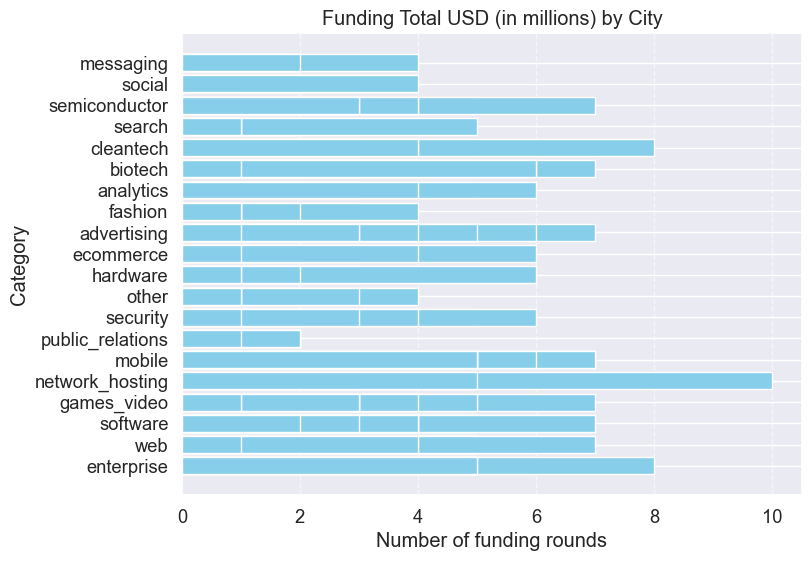

In [30]:

top_category_code = df['category_code'].value_counts().head(20).index.tolist()
filtered_df = df[df['category_code'].isin(top_category_code)].copy()  # Make a copy to avoid modifying the original DataFrame
filtered_df.loc[:, 'funding_rounds'] = df['funding_rounds']

plt.figure(figsize=(8, 6))
plt.barh(filtered_df['category_code'], filtered_df['funding_rounds'], color=['skyblue'])
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.xlabel('Number of funding rounds')
plt.ylabel('Category')
plt.title('Funding Total USD (in millions) by City')
plt.show()


<div class="alert alert-warning" style="color:#000; font-size:15px;  line-height:1.5;font-family: 'Georgia', serif;">
<u>Interpretation</u>:<br>
The box plot analysis suggests that startups in network_hosting tend to have a higher number of funding rounds, as compared to startups in other category.
</div>

<h6 class="alert alert-danger" style="font-size:15px;  line-height:1.5;font-family: 'Georgia', serif;">
Comparison of has_Angel, and has_VC vs Status
    </h6>

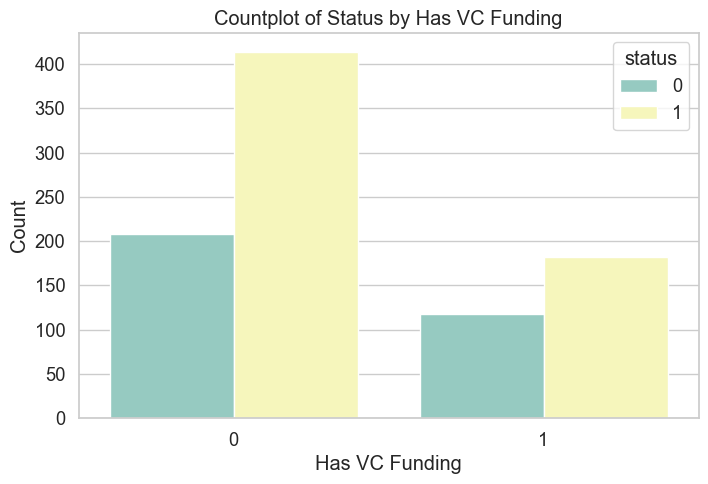

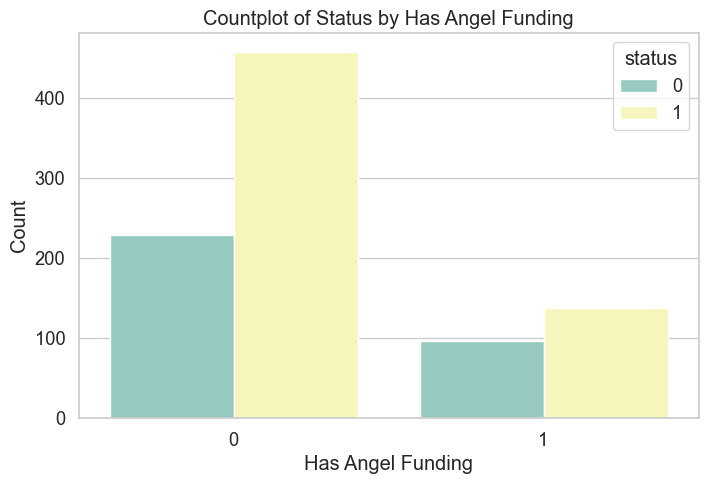

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Your code goes here

# Creating a copy of the DataFrame to avoid modifying the original
df_copy = df.copy()



# Set style and color palette
sns.set_style("whitegrid")
sns.set_palette("Set3")

# Create a countplot for 'has_VC'
plt.figure(figsize=(8, 5))
sns.countplot(x='has_VC', hue='status', data=df_copy, palette='Set3')
plt.xlabel('Has VC Funding')
plt.ylabel('Count')
plt.title('Countplot of Status by Has VC Funding')

# Create a countplot for 'has_angel'
plt.figure(figsize=(8, 5))
sns.countplot(x='has_angel', hue='status', data=df_copy, palette='Set3')
plt.xlabel('Has Angel Funding')
plt.ylabel('Count')
plt.title('Countplot of Status by Has Angel Funding')

# Show the plots
plt.show()


<div class="alert alert-warning" style="color:#000; font-size:15px;  line-height:1.5;font-family: 'Georgia', serif;">
<u>Interpretation</u>:<br>
The box plot analysis suggests that startups with angel investors tend to have a higher number of average participants compared to startups with venture capital (VC) backing.
    </div>

<h4 class="alert alert-danger" style="font-size:15px;  line-height:1.5;font-family: 'Georgia', serif;">
Standard Deviation for relationships, funding_rounds, milestones and avg_participants </h4>

In [32]:
Relationships_Stdev = np.std(df['relationships'])
Funding_rounds_Stdev = np.std(df['funding_rounds'])
Milestones_Stdev = np.std(df['milestones'])
Avg_Participants_Stddev = np.std(df['avg_participants'])
print("Standard Deviation for Relationships:", Relationships_Stdev)
print("\nStandard Deviation for Funding_rounds:", Funding_rounds_Stdev)
print("\nStandard Deviation for Milestones:", Milestones_Stdev)
print("\nStandard Deviation for Avg_participations", Avg_Participants_Stddev)

Standard Deviation for Relationships: 7.262819912689959

Standard Deviation for Funding_rounds: 1.3898077516187965

Standard Deviation for Milestones: 1.3226217530623448

Standard Deviation for Avg_participations 1.8745006190011306


<div class="alert alert-warning" style="color:#000; font-size:15px;  line-height:1.5;font-family: 'Georgia', serif;">
<u>Interpretation</u>:<br>
The 'relationships' column exhibits a higher standard deviation, mainly due to the influence of outliers. The standard deviations observed in other columns appear to be within acceptable bounds.</div>

<h4 class="alert alert-danger" style="font-size:15px;  line-height:1.5;font-family: 'Georgia', serif;">
Standard Deviation for age_first_funding_year, age_last_funding_year, age_first_milestone_year, age_last_milestone_year
</h4>

In [33]:
age_first_funding_year_Stdev = np.std(df['age_first_funding_year'])
age_last_funding_year_Stdev = np.std(df['age_last_funding_year'])
age_first_milestone_year_Stdev = np.std(df['age_first_milestone_year'])
age_last_milestone_year_Stddev = np.std(df['age_last_milestone_year'])
print("Standard Deviation for age_first_funding_year:", age_first_funding_year_Stdev)
print("\nStandard Deviation for age_last_funding_year:", age_last_funding_year_Stdev)
print("\nStandard Deviation for age_first_milestone_year:", age_first_milestone_year_Stdev)
print("\nStandard Deviation for age_last_milestone_year:", age_last_milestone_year_Stddev)

Standard Deviation for age_first_funding_year: 2.4469925745507735

Standard Deviation for age_last_funding_year: 2.925230531289492

Standard Deviation for age_first_milestone_year: 2.5496628074967242

Standard Deviation for age_last_milestone_year: 2.847512518168793


<div class="alert alert-warning" style="color:#000; font-size:15px;  line-height:1.5;font-family: 'Georgia', serif;">
<u>Interpretation</u>:<br>
    The standard deviations for the mentioned columns seem satisfactory, requiring no further adjustments.</div>

<h4 class="alert alert-danger" style="font-size:15px;  line-height:1.5;font-family: 'Georgia', serif;">
    OUTLIER DETECTION</h4>

<div class="alert alert-info" style="color:#000; font-size:15px;  line-height:1.5;font-family: 'Georgia', serif;">
Outlier detection in predictive analysis entails recognizing and managing data points that deviate notably from the broader dataset, as these outliers can significantly impact the performance of predictive models. Ensuring robustness and accuracy in capturing predominant data patterns, identifying and addressing outliers is a crucial step in the development of predictive models.</div>

<h4 class="alert alert-danger" style="font-size:15px;  line-height:1.5;font-family: 'Georgia', serif;">
Visual representation of the Outliers using box plot</h4>

<div class="alert alert-info" style="color:#000; font-size:15px;  line-height:1.5;font-family: 'Georgia', serif;">
A box plot illustrating the values of funding rounds, milestones, average participants, age at first funding year, age at last funding year, age at first milestone year, age at last milestone year, and total funding in USD, is presented below.</div>

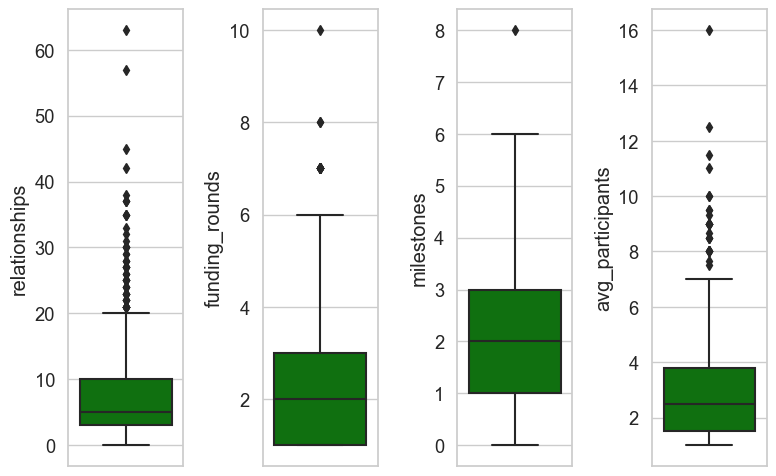

In [34]:
featuresRFMA = ['relationships','funding_rounds','milestones','avg_participants']
plt.figure(figsize=(8, 5))
for i in range(0, len(featuresRFMA)):
    plt.subplot(1, len(featuresRFMA), i+1)
    sns.boxplot(y=df[featuresRFMA[i]], color='green', orient='v')
    plt.tight_layout()

<div class="alert alert-warning" style="color:#000; font-size:15px;  line-height:1.5;font-family: 'Georgia', serif;">
<u>Interpretation</u>:<br>
The 'Relationships,' 'Funding_rounds,' and 'Avg_Participants' columns exhibit outliers, while the 'Milestones' column appears to be free from any such extreme values.
    </div>

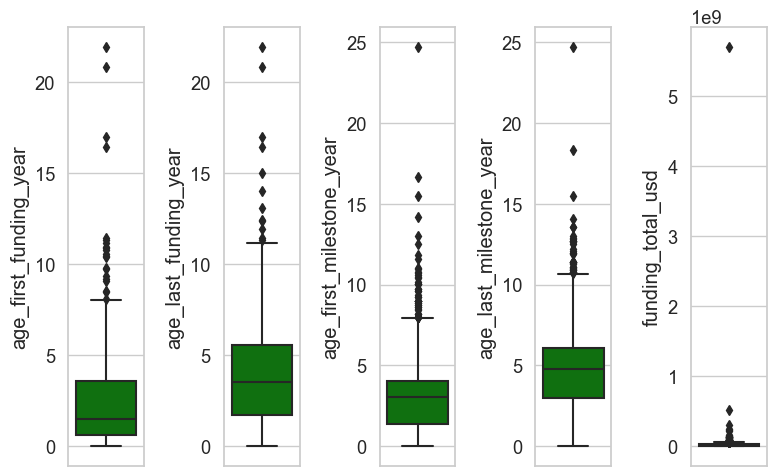

In [35]:
featuresRFMA = ['age_first_funding_year','age_last_funding_year','age_first_milestone_year','age_last_milestone_year','funding_total_usd']

plt.figure(figsize=(8, 5))
for i in range(0, len(featuresRFMA)):
    plt.subplot(1, len(featuresRFMA), i+1)
    sns.boxplot(y=df[featuresRFMA[i]], color='green', orient='v')
    plt.tight_layout()

<div class="alert alert-warning" style="color:#000; font-size:15px;  line-height:1.5;font-family: 'Georgia', serif;">
<u>Interpretation</u>:<br>
The 'age_first_funding_year','age_last_funding_year', 'age_first_milestone_year' and'age_last_milestone_year'columns exhibit outliers, while the 'funding_total_usd' column appears to be free from any such extreme values.
    </div>

In [36]:
def drop_outliers(df, column):
    iqr = 1.5 * (np.percentile(df[column], 75) - np.percentile(df[column], 25))
    df.drop(df[df[column] > (iqr + np.percentile(df[column], 75))].index, inplace=True)
    df.drop(df[df[column] < (np.percentile(df[column], 25) - iqr)].index, inplace=True)

In [37]:
df['age_first_milestone_year'] = df.age_first_milestone_year.astype(float)
df['age_last_milestone_year'] = df.age_last_milestone_year.astype(float)
df['age_first_funding_year'] = df.age_first_funding_year.astype(float)
df['age_last_funding_year'] = df.age_last_funding_year.astype(float)
df['funding_rounds'] = df.funding_rounds.astype(float)
df['funding_total_usd'] = df.funding_total_usd.astype(float)
df['milestones'] = df.milestones.astype(float)
df['relationships'] = df.relationships.astype(float)
df['avg_participants'] = df.avg_participants.astype(float)

In [38]:
drop_outliers(df, 'age_first_funding_year')
drop_outliers(df, 'age_last_funding_year')
drop_outliers(df, 'age_first_milestone_year')
drop_outliers(df, 'age_last_milestone_year')
drop_outliers(df, 'funding_total_usd')
drop_outliers(df, 'avg_participants')
drop_outliers(df, 'funding_rounds')
drop_outliers(df, 'relationships')

<div class="alert alert-warning" style="color:#000; font-size:15px;  line-height:1.5;font-family: 'Georgia', serif;">
<u>Interpretation</u>:<br>
Initially, a function was created to eliminate outliers from the dataset. Following this, the columns containing outliers were converted to the float data type, after which the outlier removal function was invoked.
    </div>

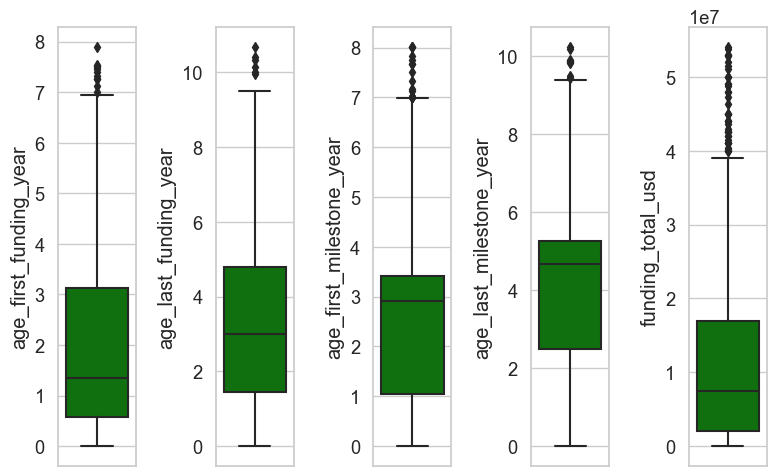

In [39]:
featuresRFMA = ['age_first_funding_year','age_last_funding_year','age_first_milestone_year','age_last_milestone_year','funding_total_usd']

plt.figure(figsize=(8, 5))
for i in range(0, len(featuresRFMA)):
    plt.subplot(1, len(featuresRFMA), i+1)
    sns.boxplot(y=df[featuresRFMA[i]], color='green', orient='v')
    plt.tight_layout()

<div class="alert alert-warning" style="color:#000; font-size:15px;  line-height:1.5;font-family: 'Georgia', serif;">
<u>Interpretation</u>:<br>
The box plot analysis indicates the presence of outliers; however, we choose not to treat them as such, as they represent fairly typical figures within the context of startup statistics.</div>

<h4 class="alert alert-danger" style="font-size:15px;  line-height:1.5;font-family: 'Georgia', serif;">
Correlation Heat Map<h4>

C:\Users\sahid\AppData\Local\Temp\ipykernel_9080\70399117.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot = True, cmap = 'viridis', linewidth = 0.5, fmt = '.1f')


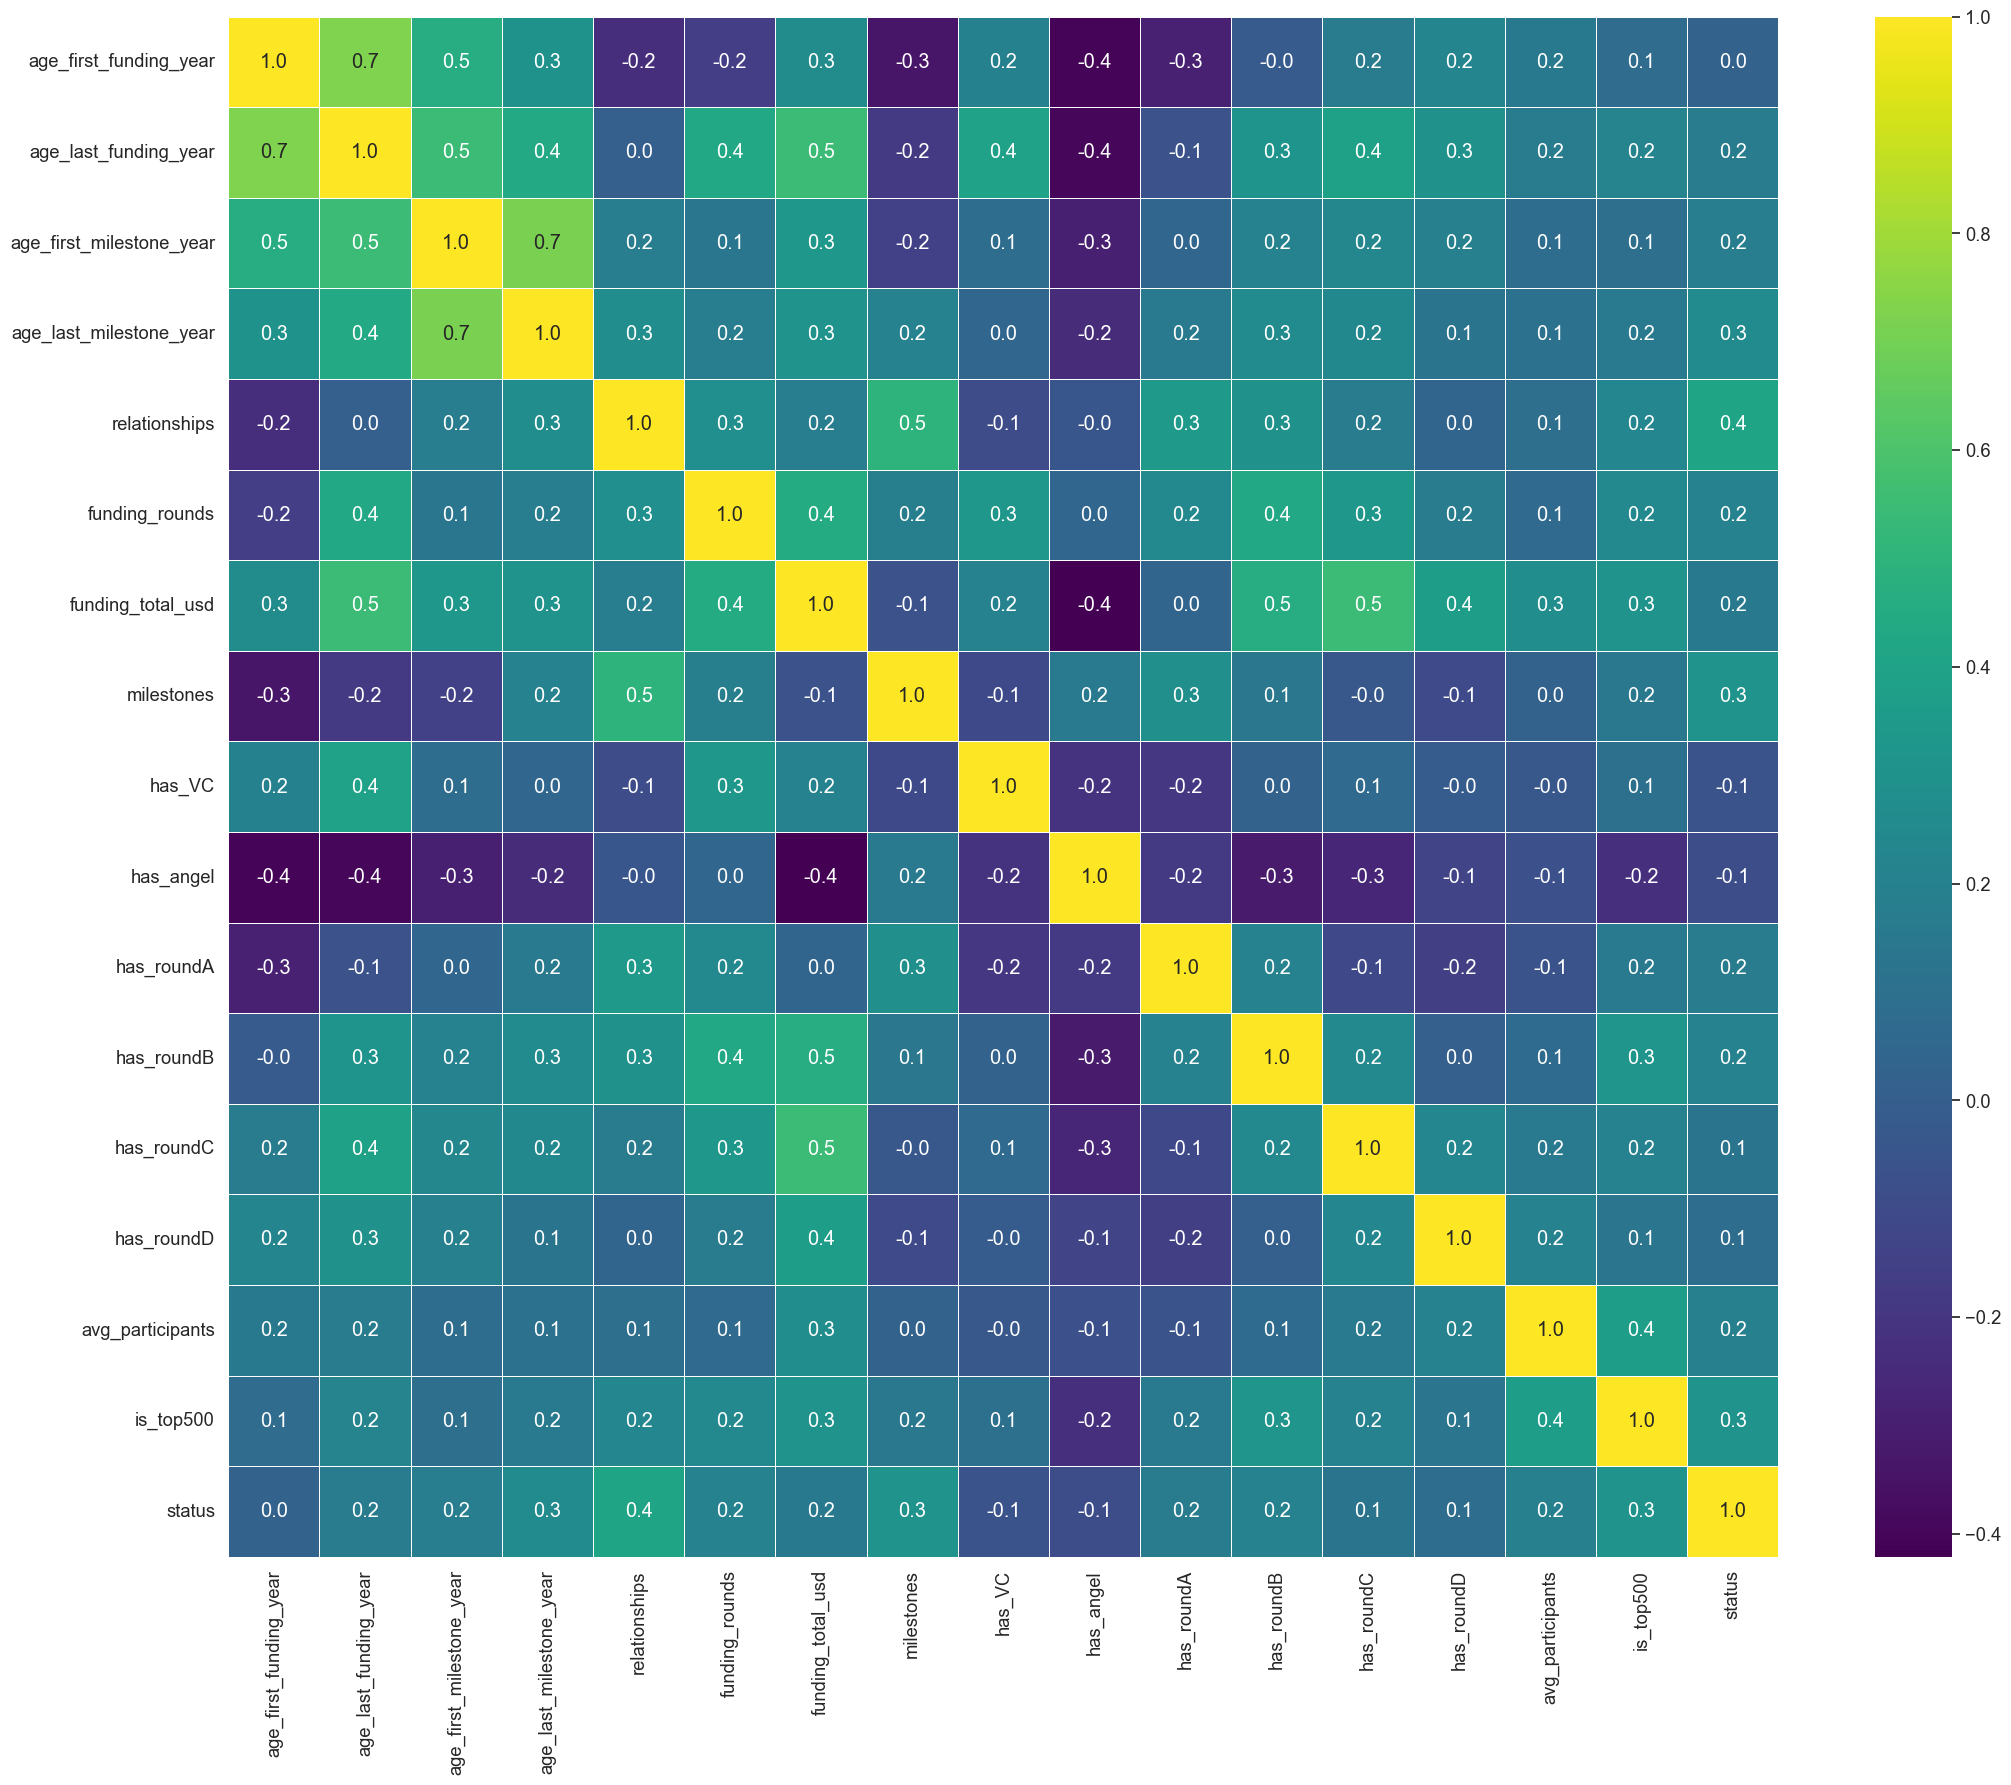

In [40]:
plt.figure(figsize = (25, 20))
sns.heatmap(df.corr(),annot = True, cmap = 'viridis', linewidth = 0.5, fmt = '.1f')
plt.show()

<div class="alert alert-warning" style="color:#000; font-size:15px;  line-height:1.5;font-family: 'Georgia', serif;">
<u>Interpretation</u>:<br>
The correlation heatmap above clearly indicates a strong correlation between "age_first_funding_year" and "age_last_funding_year," as well as among "age_first_milestone_year," "age_last_milestone_year," and "milestones." Therefore, for modeling purposes, we will not utilize these columns"

<h4 class="alert alert-danger" style="font-size:15px;  line-height:1.5;font-family: 'Georgia', serif;">
Checking the Distribution of the Data to see if it follows - Normal Distribution</div>

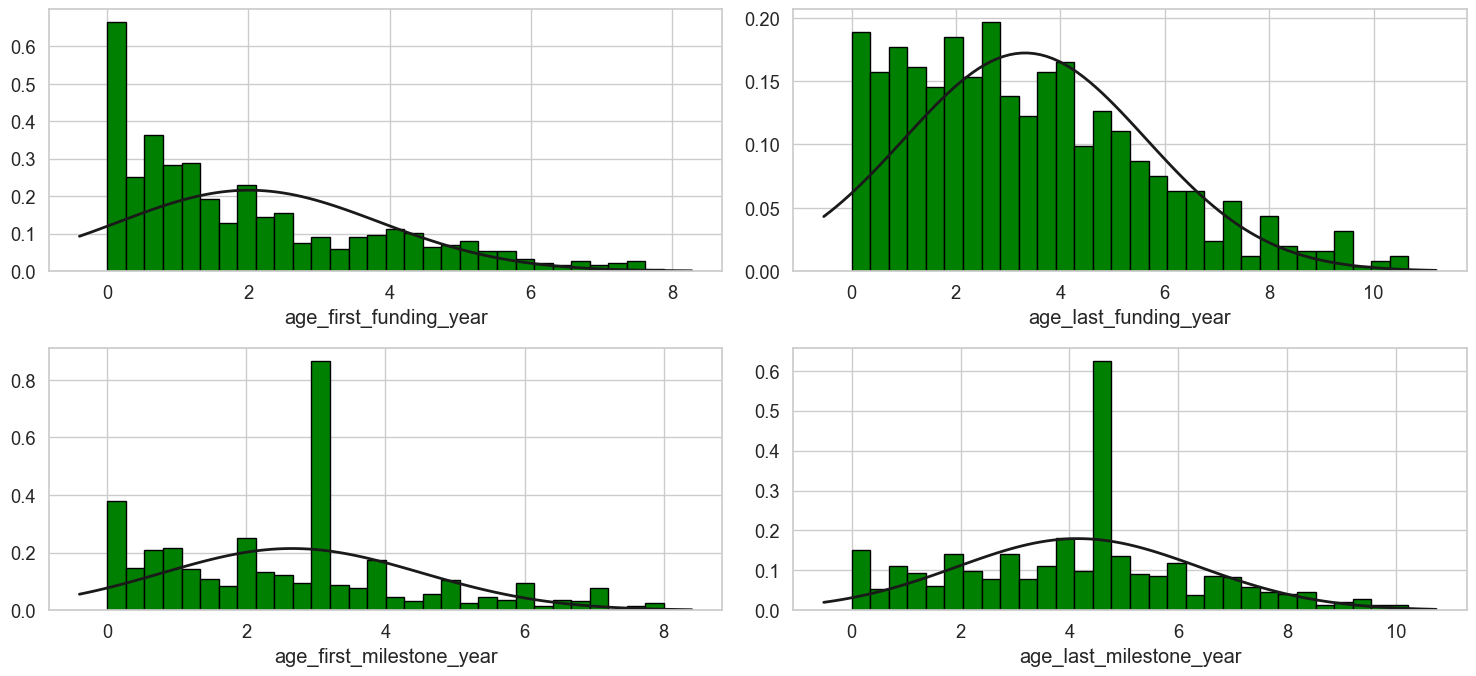

In [41]:
plt.figure(figsize=(15, 7), dpi=100)

# Plot the first subplot
plt.subplot(2, 2, 1)
plt.hist(df["age_first_funding_year"], color="green", bins=30, edgecolor='black', density=True)
plt.xlabel("age_first_funding_year")

# Add a normality line
mu, sigma = np.mean(df["age_first_funding_year"]), np.std(df["age_first_funding_year"])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, sigma)
plt.plot(x, p, 'k', linewidth=2)

# Plot the second subplot
plt.subplot(2, 2, 2)
plt.hist(df["age_last_funding_year"], color="green", bins=30, edgecolor='black', density=True)
plt.xlabel("age_last_funding_year")

# Add a normality line
mu, sigma = np.mean(df["age_last_funding_year"]), np.std(df["age_last_funding_year"])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, sigma)
plt.plot(x, p, 'k', linewidth=2)

# Plot the third subplot
plt.subplot(2, 2, 3)
plt.hist(df["age_first_milestone_year"], color="green", bins=30, edgecolor='black', density=True)
plt.xlabel("age_first_milestone_year")

# Add a normality line
mu, sigma = np.mean(df["age_first_milestone_year"]), np.std(df["age_first_milestone_year"])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, sigma)
plt.plot(x, p, 'k', linewidth=2)

# Plot the fourth subplot
plt.subplot(2, 2, 4)
plt.hist(df["age_last_milestone_year"], color="green", bins=30, edgecolor='black', density=True)
plt.xlabel("age_last_milestone_year")

# Add a normality line
mu, sigma = np.mean(df["age_last_milestone_year"]), np.std(df["age_last_milestone_year"])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, sigma)
plt.plot(x, p, 'k', linewidth=2)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()



<div class="alert alert-warning" style="color:#000; font-size:15px;  line-height:1.5;font-family: 'Georgia', serif;">
<u>Interpretation</u>:<br>
    Based on the above histogram plot, it appears the ages at which the first and last milestones are achieved demonstrate a relatively normal distribution, while the ages at which the first and last funding events occur are right-skewed, suggesting a tendency for younger ages in these instances with some variability.</div>

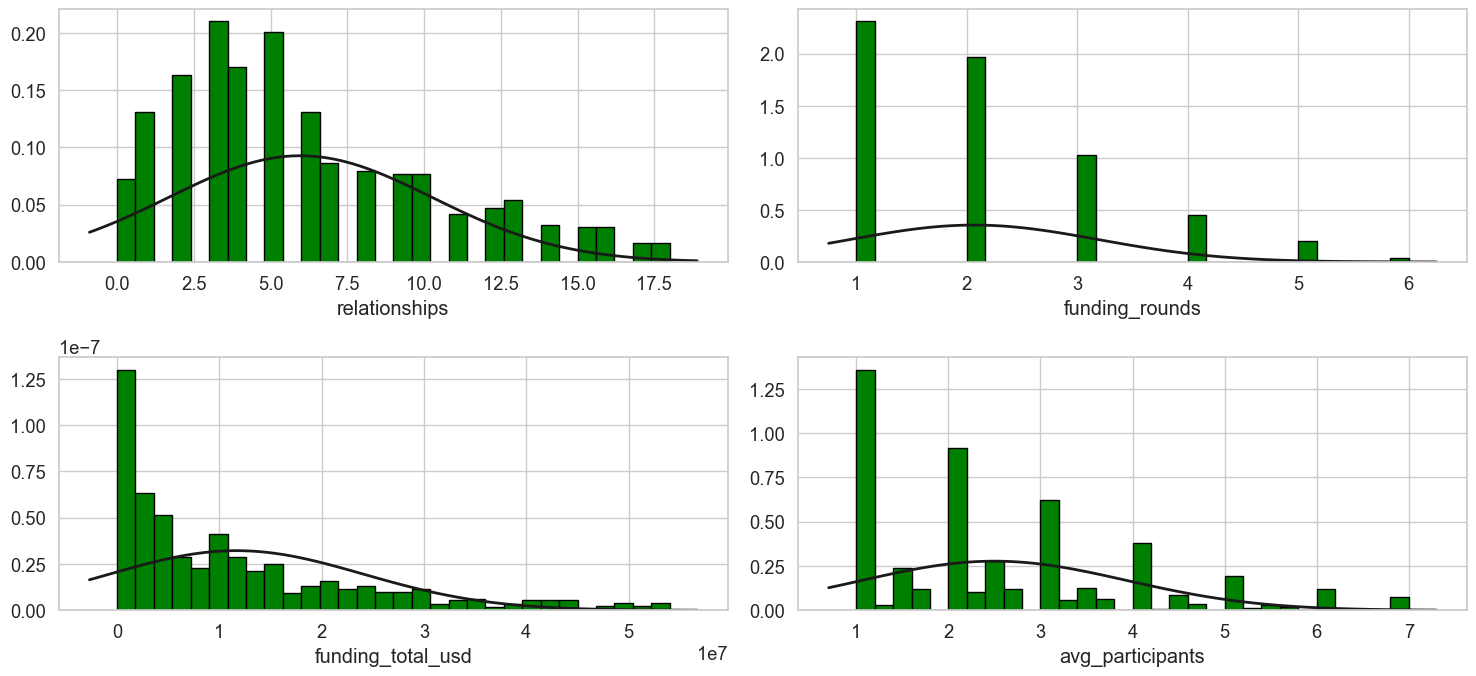

In [42]:
plt.figure(figsize=(15, 7), dpi=100)

# Plot the first subplot
plt.subplot(2, 2, 1)
plt.hist(df["relationships"], color="green", bins=30, edgecolor='black', density=True)
plt.xlabel("relationships")

# Add a normality line
mu, sigma = np.mean(df["relationships"]), np.std(df["relationships"])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, sigma)
plt.plot(x, p, 'k', linewidth=2)

plt.subplot(2, 2, 2)
plt.hist(df["funding_rounds"], color="green", bins=30, edgecolor='black', density=True)
plt.xlabel("funding_rounds")

mu, sigma = np.mean(df["funding_rounds"]), np.std(df["funding_rounds"])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, sigma)
plt.plot(x, p, 'k', linewidth=2)

plt.subplot(2, 2, 3)
plt.hist(df["funding_total_usd"], color="green", bins=30, edgecolor='black', density=True)
plt.xlabel("funding_total_usd")

mu, sigma = np.mean(df["funding_total_usd"]), np.std(df["funding_total_usd"])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, sigma)
plt.plot(x, p, 'k', linewidth=2)

plt.subplot(2, 2, 4)
plt.hist(df["avg_participants"], color="green", bins=30, edgecolor='black', density=True)
plt.xlabel("avg_participants")

mu, sigma = np.mean(df["avg_participants"]), np.std(df["avg_participants"])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, sigma)
plt.plot(x, p, 'k', linewidth=2)

plt.tight_layout()
plt.show()


<div class="alert alert-warning" style="color:#000; font-size:15px;  line-height:1.5;font-family: 'Georgia', serif;">
<u>Interpretation</u>:<br>
Upon examination of the histogram plot, it seems that none of the mentioned columns follows to a normal distribution.

<h4 class="alert alert-danger" style="font-size:15px;  line-height:1.5;font-family: 'Georgia', serif;">
Scaling the columns using Log and Boxcox transformation.

In [43]:
from scipy.stats import boxcox
df["age_first_funding_year"] = np.log(df["age_first_funding_year"]+1)
df["age_last_funding_year"] = np.log(df["age_last_funding_year"]+1)
df["relationships"] = np.log(df["relationships"]+1)
df["funding_rounds"] = np.log(df["funding_rounds"]+1)
df["avg_participants"] = np.log(df["avg_participants"]+1)
df["milestones"] = np.sqrt(df["milestones"])
transformed_data, lambda_value = boxcox(df["funding_total_usd"])
df["funding_total_usd"] = transformed_data

<div class="alert alert-warning" style="color:#000; font-size:15px;  line-height:1.5;font-family: 'Georgia', serif;">
<u>Interpretation</u>:<br>
    We applied a Box-Cox transformation to the "funding_total_usd" column due to the presence of extremely large values, making conventional logarithmic and square root scaling ineffective.

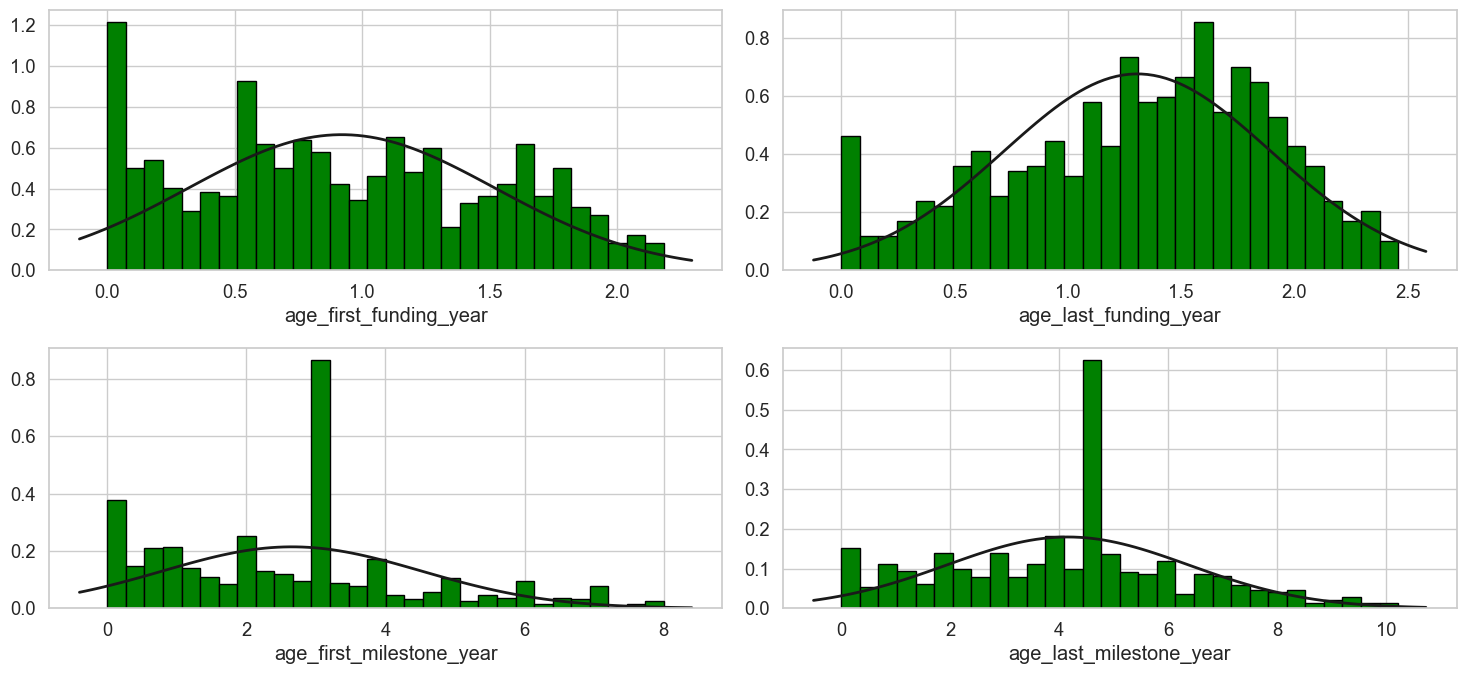

In [44]:
plt.figure(figsize=(15, 7), dpi=100)

# Plot the first subplot
plt.subplot(2, 2, 1)
plt.hist(df["age_first_funding_year"], color="green", bins=30, edgecolor='black', density=True)
plt.xlabel("age_first_funding_year")

# Add a normality line
mu, sigma = np.mean(df["age_first_funding_year"]), np.std(df["age_first_funding_year"])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, sigma)
plt.plot(x, p, 'k', linewidth=2)

# Plot the second subplot
plt.subplot(2, 2, 2)
plt.hist(df["age_last_funding_year"], color="green", bins=30, edgecolor='black', density=True)
plt.xlabel("age_last_funding_year")

# Add a normality line
mu, sigma = np.mean(df["age_last_funding_year"]), np.std(df["age_last_funding_year"])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, sigma)
plt.plot(x, p, 'k', linewidth=2)

# Plot the third subplot
plt.subplot(2, 2, 3)
plt.hist(df["age_first_milestone_year"], color="green", bins=30, edgecolor='black', density=True)
plt.xlabel("age_first_milestone_year")

# Add a normality line
mu, sigma = np.mean(df["age_first_milestone_year"]), np.std(df["age_first_milestone_year"])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, sigma)
plt.plot(x, p, 'k', linewidth=2)

# Plot the fourth subplot
plt.subplot(2, 2, 4)
plt.hist(df["age_last_milestone_year"], color="green", bins=30, edgecolor='black', density=True)
plt.xlabel("age_last_milestone_year")

# Add a normality line
mu, sigma = np.mean(df["age_last_milestone_year"]), np.std(df["age_last_milestone_year"])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, sigma)
plt.plot(x, p, 'k', linewidth=2)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()



<div class="alert alert-warning" style="color:#000; font-size:15px;  line-height:1.5;font-family: 'Georgia', serif;">
<u>Interpretation</u>:<br>
    From the histogram plot above, it is evident that the columns began to exhibit a normal distribution after the scaling process.</div>

<h2 class="alert alert-success"  style="color:#000; font-family: 'Courier New', Courier, monospace;">4. FEATURE ENGINEERING

<div class="alert alert-info" style="color:#000; font-size:15px;  line-height:1.5;font-family: 'Georgia', serif;">

Feature engineering is a key process in data preparation for predictive modeling, involving the creation or transformation of variables to enhance the performance of machine learning models. This technique aims to extract relevant information from raw data, improving the model's ability to capture patterns and make accurate predictions. Feature engineering includes tasks such as creating new variables based on existing ones, handling categorical variables through encoding, and scaling numerical features for consistency. </div>

In [45]:
#Created an overall round featrues
df['has_RoundABCD'] = np.where((df['has_roundA'] == 1) | (df['has_roundB'] == 1) | (df['has_roundC'] == 1) | (df['has_roundD'] == 1), 1, 0)
df.head()

,state_code,city,founded_at,closed_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,...,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,has_RoundABCD
0,CA,San Diego,2007-01-01,2011-10-10 01:47:27.761193984,1.178440,1.386969,4.6685,6.7041,1.386294,1.386294,...,0,1,0,0,0,0,0.693147,0,1,0
1,CA,Los Gatos,2000-01-01,2011-10-10 01:47:27.761193984,1.812542,2.397650,7.0055,7.0055,2.302585,1.609438,...,1,0,0,1,1,1,1.749200,1,1,1
2,CA,San Diego,2009-03-18,2011-10-10 01:47:27.761193984,0.709463,0.709463,1.4575,2.2055,1.791759,0.693147,...,0,0,1,0,0,0,1.609438,1,1,1
3,CA,Cupertino,2002-01-01,2011-10-10 01:47:27.761193984,1.418641,1.842944,6.0027,6.0027,1.791759,1.386294,...,0,0,0,1,1,1,1.466329,1,1,1
4,CA,San Francisco,2010-08-01,2012-10-01 00:00:00.000000000,0.000000,0.981517,0.0384,0.0384,1.098612,1.098612,...,1,1,0,0,0,0,0.693147,1,0,0


<div class="alert alert-warning" style="color:#000; font-size:15px;  line-height:1.5;font-family: 'Georgia', serif;">
<u>Interpretation</u>:<br>
We created a new feature named "has_RoundABCD". This feature is assigned a value of 1 if any of the individual features ('has_roundA', 'has_roundB', 'has_roundC', 'has_roundD') is equal to 1; otherwise, it is assigned a value of 0.</div>

In [46]:
#Created has_investor feature
df['has_Investor'] = np.where((df['has_VC'] == 1) | (df['has_angel'] == 1), 1, 0)
df.head()

,state_code,city,founded_at,closed_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,...,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,has_RoundABCD,has_Investor
0,CA,San Diego,2007-01-01,2011-10-10 01:47:27.761193984,1.178440,1.386969,4.6685,6.7041,1.386294,1.386294,...,1,0,0,0,0,0.693147,0,1,0,1
1,CA,Los Gatos,2000-01-01,2011-10-10 01:47:27.761193984,1.812542,2.397650,7.0055,7.0055,2.302585,1.609438,...,0,0,1,1,1,1.749200,1,1,1,1
2,CA,San Diego,2009-03-18,2011-10-10 01:47:27.761193984,0.709463,0.709463,1.4575,2.2055,1.791759,0.693147,...,0,1,0,0,0,1.609438,1,1,1,0
3,CA,Cupertino,2002-01-01,2011-10-10 01:47:27.761193984,1.418641,1.842944,6.0027,6.0027,1.791759,1.386294,...,0,0,1,1,1,1.466329,1,1,1,0
4,CA,San Francisco,2010-08-01,2012-10-01 00:00:00.000000000,0.000000,0.981517,0.0384,0.0384,1.098612,1.098612,...,1,0,0,0,0,0.693147,1,0,0,1


<div class="alert alert-warning" style="color:#000; font-size:15px;  line-height:1.5;font-family: 'Georgia', serif;">
<u>Interpretation</u>:<br>
We generated a new feature named "has_Investor". This feature takes the value 1 if either the "has_VC" or "has_angel" column has a value of 1, and it is assigned the value 0 otherwise.</div>

In [47]:
#Created Round and Investor feature
df['has_RI'] = np.where((df['has_RoundABCD'] == 0) & (df['has_Investor'] == 1), 1, 0)
df.head()

,state_code,city,founded_at,closed_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,...,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,has_RoundABCD,has_Investor,has_RI
0,CA,San Diego,2007-01-01,2011-10-10 01:47:27.761193984,1.178440,1.386969,4.6685,6.7041,1.386294,1.386294,...,0,0,0,0,0.693147,0,1,0,1,1
1,CA,Los Gatos,2000-01-01,2011-10-10 01:47:27.761193984,1.812542,2.397650,7.0055,7.0055,2.302585,1.609438,...,0,1,1,1,1.749200,1,1,1,1,0
2,CA,San Diego,2009-03-18,2011-10-10 01:47:27.761193984,0.709463,0.709463,1.4575,2.2055,1.791759,0.693147,...,1,0,0,0,1.609438,1,1,1,0,0
3,CA,Cupertino,2002-01-01,2011-10-10 01:47:27.761193984,1.418641,1.842944,6.0027,6.0027,1.791759,1.386294,...,0,1,1,1,1.466329,1,1,1,0,0
4,CA,San Francisco,2010-08-01,2012-10-01 00:00:00.000000000,0.000000,0.981517,0.0384,0.0384,1.098612,1.098612,...,0,0,0,0,0.693147,1,0,0,1,1


<div class="alert alert-warning" style="color:#000; font-size:15px;  line-height:1.5;font-family: 'Georgia', serif;">
<u>Interpretation</u>:<br>
We generated a new feature named 'has_RI'. This feature is set to 1 when both conditions, namely 'has_RoundABCD' being 0 and 'has_Investor' being 1, are met; otherwise, it is set to 0.</div>

In [48]:
from datetime import datetime

# Created a new column 'age_startup' with the difference between 'closed_at' and 'founded_at'
df['age_startup'] = df['closed_at'] - df['founded_at']

# Appended the 'age_startup' column to the DataFrame
df['age_startup'] = df['age_startup'].astype('timedelta64[D]')
df['age_startup'] = df['age_startup'].astype(int)
df


,state_code,city,founded_at,closed_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,...,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,has_RoundABCD,has_Investor,has_RI,age_startup
0,CA,San Diego,2007-01-01,2011-10-10 01:47:27.761193984,1.178440,1.386969,4.6685,6.7041,1.386294,1.386294,...,0,0,0,0.693147,0,1,0,1,1,1743
1,CA,Los Gatos,2000-01-01,2011-10-10 01:47:27.761193984,1.812542,2.397650,7.0055,7.0055,2.302585,1.609438,...,1,1,1,1.749200,1,1,1,1,0,4300
2,CA,San Diego,2009-03-18,2011-10-10 01:47:27.761193984,0.709463,0.709463,1.4575,2.2055,1.791759,0.693147,...,0,0,0,1.609438,1,1,1,0,0,936
3,CA,Cupertino,2002-01-01,2011-10-10 01:47:27.761193984,1.418641,1.842944,6.0027,6.0027,1.791759,1.386294,...,1,1,1,1.466329,1,1,1,0,0,3569
4,CA,San Francisco,2010-08-01,2012-10-01 00:00:00.000000000,0.000000,0.981517,0.0384,0.0384,1.098612,1.098612,...,0,0,0,0.693147,1,0,0,1,1,792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
916,NY,New York,2006-09-06,2011-10-10 01:47:27.761193984,0.000000,1.595096,2.9151,5.7342,2.833213,1.386294,...,1,0,0,1.203963,1,1,1,1,0,1860
918,CA,San Francisco,2009-01-01,2011-10-10 01:47:27.761193984,0.417262,0.417262,0.5808,4.5260,2.302585,0.693147,...,0,0,0,1.945910,1,1,1,0,0,1012
919,MA,Burlington,1998-01-01,2008-06-25 00:00:00.000000000,2.110468,2.325070,6.0027,6.0027,0.693147,1.386294,...,1,0,0,1.299292,1,0,1,1,0,3828
921,CA,San Francisco,2009-01-01,2011-10-10 01:47:27.761193984,0.564689,1.343622,0.7589,3.8356,2.564949,1.098612,...,1,0,0,0.693147,1,1,1,0,0,1012


<div class="alert alert-warning" style="color:#000; font-size:15px;  line-height:1.5;font-family: 'Georgia', serif;">
<u>Interpretation</u>:<br>
    We have created a new feature named 'age_startup'. This feature is calculated by subtracting the 'founded_at' column from the 'closed_at' column. The resulting 'age_startup' values, initially represented as a time duration, were converted to the number of days and subsequently converted to integers.</div>

<h4 class="alert alert-danger" style="font-size:15px;  line-height:1.5;font-family: 'Georgia', serif;">
Skewness and Kurtosis</h4>

In [49]:
# #Skewness
df.skew(numeric_only=True)

age_first_funding_year      0.154577
age_last_funding_year      -0.395276
age_first_milestone_year    0.616779
age_last_milestone_year     0.109505
relationships              -0.508056
funding_rounds              0.444367
funding_total_usd          -0.139110
milestones                 -0.710501
has_VC                      0.868886
has_angel                   0.996973
has_roundA                  0.005614
has_roundB                  0.662205
has_roundC                  1.651169
has_roundD                  3.869396
avg_participants            0.313770
is_top500                  -1.326158
status                     -0.472998
has_RoundABCD              -0.950682
has_Investor               -0.157679
has_RI                      1.101942
age_startup                 0.329879
dtype: float64

<div class="alert alert-warning" style="color:#000; font-size:15px;  line-height:1.5;font-family: 'Georgia', serif;">
<u>Interpretation</u>:<br>
    The column with the highest skewness is 'has_roundD'; however, it will be removed during the feature selection process. The remaining columns exhibit skewness within acceptable ranges for analysis.<div>
   

In [50]:
# #Kurtosis
df.kurtosis(numeric_only=True)

age_first_funding_year      -1.059465
age_last_funding_year       -0.587894
age_first_milestone_year    -0.020317
age_last_milestone_year     -0.305600
relationships               -0.049490
funding_rounds              -0.814828
funding_total_usd           -0.764319
milestones                  -0.342850
has_VC                      -1.248543
has_angel                   -1.008878
has_roundA                  -2.005594
has_roundB                  -1.565879
has_roundC                   0.728393
has_roundD                  13.008657
avg_participants            -0.855180
is_top500                   -0.241991
status                      -1.781271
has_RoundABCD               -1.099291
has_Investor                -1.980693
has_RI                      -0.787939
age_startup                 -0.709249
dtype: float64

<div class="alert alert-warning" style="color:#000; font-size:15px;  line-height:1.5;font-family: 'Georgia', serif;">
<u>Interpretation</u>:<br>
   The column with the highest kurtosis is 'has_roundD,' but it is important to note that this column is slated for deletion during the feature selection process. The remaining columns exhibit kurtosis within acceptable ranges.</div>

<h3 class="alert alert-danger" style="font-size:25px;  line-height:1.5;font-family: 'Georgia', serif;">
Dummy Variable Creation</h3>

In [51]:
dummies = pd.get_dummies(df[['state_code', 'city', 'category_code']], prefix=['state', 'city', 'category'])
newdf = pd.concat([df, dummies], axis='columns')
new_df = newdf.select_dtypes(include=['float64','int64','int32','uint8'])

<div class="alert alert-warning" style="color:#000; font-size:15px;  line-height:1.5;font-family: 'Georgia', serif;">
<u>Interpretation</u>:<br>
    We generated dummy variables for the 'state_code,' 'city,' and 'category_code' columns and subsequently filtered the DataFrame to retain only columns with data types float64, int64, int32, and uint8.</div>
    

<h2 class="alert alert-success"  style="color:#000; font-family: 'Courier New', Courier, monospace;">5. FEATURE SELECTION</h2>

<div class="alert alert-info" style="color:#000; font-size:15px;  line-height:1.5;font-family: 'Georgia', serif;">
A process of reducing the number of input variables when developing a predictive model. Performing feature selection reduces overfitting, improves model performance and reduces training time.


In [52]:
new_df=new_df.drop(columns=['age_first_milestone_year','age_last_milestone_year','age_first_funding_year','age_last_funding_year','has_roundA','has_roundB','has_roundC',
 'has_roundD','has_VC','has_angel','has_RoundABCD','has_Investor'])

<div class="alert alert-warning" style="color:#000; font-size:15px;  line-height:1.5;font-family: 'Georgia', serif;">
<u>Interpretation</u>:<br>
    We removed columns with high correlation among each other to mitigate issues related to multicollinearity and enhance the overall robustness of the dataset. </div>



<h4 class="alert alert-danger" style="font-size:15px;  line-height:1.5;font-family: 'Georgia', serif;"> Feature Selection Method #1 - Extra Trees Classifier</h4>

<div class="alert alert-info" style="color:#000; font-size:15px;  line-height:1.5;font-family: 'Georgia', serif;">
The Extra Trees Classifier is an ensemble machine learning algorithm that builds multiple decision trees and combines their predictions, introducing additional randomness in the tree-building process to enhance model generalization.</div>

In [53]:
X = new_df.drop(columns=['status'])
y = new_df['status']
model = ExtraTreesClassifier()
model.fit(X, y)
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df.head(20)

,Feature,Importance
0,relationships,0.113134
3,milestones,0.081715
2,funding_total_usd,0.074063
7,age_startup,0.060949
4,avg_participants,0.057100
5,is_top500,0.048842
1,funding_rounds,0.045329
6,has_RI,0.026238
260,category_web,0.016062
257,category_software,0.014925


<h4 class="alert alert-danger" style="font-size:15px;  line-height:1.5;font-family: 'Georgia', serif;"> Feature Selection Method #2 - Random Forest Classifier Method </h4>

<div class="alert alert-info" style="color:#000; font-size:15px;  line-height:1.5;font-family: 'Georgia', serif;">
We utilized a RandomForestClassifier to perform feature selection, leveraging the model's ability to assess variable importance and identify the most relevant features for predictive modeling.</div>

In [54]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X, y)
feature_importances = model.feature_importances_
fi_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
fi_df = fi_df.sort_values(by='Importance', ascending=False)
fi_df.head(20)

,Feature,Importance
0,relationships,0.145497
2,funding_total_usd,0.109669
7,age_startup,0.100545
3,milestones,0.078121
4,avg_participants,0.069738
1,funding_rounds,0.042036
5,is_top500,0.038817
6,has_RI,0.020210
9,state_CA,0.012368
260,category_web,0.012203


<h4 class="alert alert-danger" style="font-size:15px;  line-height:1.5;font-family: 'Georgia', serif;"> Feature Selection Method #3 - Analysis of Variance (ANOVA)</h4>

<div class="alert alert-info" style="color:#000; font-size:15px;  line-height:1.5;font-family: 'Georgia', serif;">
ANOVA is employed in feature selection to assess the statistical significance of the variance between different groups of a categorical variable, aiding in the identification of influential features for predictive modeling.</div>

In [55]:
from sklearn.feature_selection import f_classif
f_scores, p_values = f_classif(X, y)
anova_results = pd.DataFrame({'Feature': X.columns, 'F-Score': f_scores, 'p-Value': p_values})
anova_results = anova_results.sort_values(by='p-Value')
anova_results.head(20)

,Feature,F-Score,p-Value
0,relationships,191.494399,9.629676e-39
3,milestones,97.562028,1.192704e-21
5,is_top500,73.707924,5.670819e-17
2,funding_total_usd,51.438823,1.855626e-12
6,has_RI,36.795301,2.129997e-09
1,funding_rounds,35.341284,4.333076e-09
4,avg_participants,34.316483,7.156825e-09
129,city_Los Angeles,11.279587,8.253564e-04
32,state_PA,9.780704,1.835352e-03
249,category_other,8.269872,4.151241e-03


<h4 class="alert alert-danger" style="font-size:15px;  line-height:1.5;font-family: 'Georgia', serif;">  Dropping the other features that were not selected</h4>

In [56]:
n=30
anova_columns = set(anova_results['Feature'].head(n).tolist())
extra_trees_columns = set(importance_df['Feature'].head(n).tolist())
fi_columns = set(fi_df['Feature'].head(n).tolist())
common_features = anova_columns & extra_trees_columns & fi_columns
common_features.add('status')

selected_columns = new_df.columns.intersection(common_features)

# Create a new DataFrame with only the selected columns
new_df = new_df[selected_columns]

<h2 class="alert alert-success"  style="color:#000; font-family: 'Courier New', Courier, monospace;">
6. DATA SPLITTING</h2>

<h4 class="alert alert-danger" style="font-size:15px;  line-height:1.5;font-family: 'Courier New', Courier, monospace;">  Splitting X and y to prepare for the modelling phase</h4>

In [57]:
X = new_df.drop(columns=['status'])  # Selected Independent Features
y = new_df['status']  # Target Variable
display(X.shape, y.shape) 

(714, 14)

(714,)

<h4 class="alert alert-danger" style="font-size:15px;  line-height:1.5;font-family: 'Courier New', Courier, monospace;"> Dividing the dataset into two parts: train & test</h4>

In [58]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=40) #80% Train and 20% Test
display(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(571, 14)

(571,)

(143, 14)

(143,)

In [59]:
X_test
# X_test.head(10).to_csv(r'C:\Users\sahid\Desktop\test_data.csv', index=False)

<div class="alert alert-warning" style="color:#000; font-size:15px;  line-height:1.5;font-family: 'Georgia', serif;">
<u>Interpretation</u>:<br>
We have split the new_df dataset into 4 files for training and testing purposes namely, X_train, y_train, X_test and y_test. The y contains the target variable and the X contains the independant features.
<br>
    We have saved 10 records in the file 'test_data.csv' for predictive analysis.
</div>

<h2 class="alert alert-success"  style="color:#000; font-family: 'Courier New', Courier, monospace;">
    7. MODEL SELECTION AND TRAINING:</h2>

<div class="alert alert-info" style="color:#000; font-size:15px;  line-height:1.5;font-family: 'Georgia', serif;">

We will assess multiple models to determine the optimal model for predicting our dataset.

Before we jump into the modeling part, let's get cozy with some important terms that will be our trusty guides in making smart decisions:

"True Positive" (TP): Refers to correctly predicted event values.

"False Positive" (FP): Denotes incorrectly predicted event values.

"True Negative" (TN): Signifies correctly predicted no-event values.

"False Negative" (FN): Indicates incorrectly predicted no-event values.
    </div>
 <div class="alert alert-info" style="color:#000; font-size:15px;  line-height:1.5;font-family: 'Georgia', serif;">   
  We have selected four models for training:

1. Logistic Regression
2. k-NN (k-Nearest Neighbors)
3. Decision Tree
4. Random Forest  
    </div>

<h4 class="alert alert-danger" style="font-size:15px;  line-height:1.5;font-family: 'Georgia', serif;">
    Model #1: Logsistics Regression</h4>

<div class="alert alert-info" style="color:#000; font-size:15px;  line-height:1.5;font-family: 'Georgia', serif;">

Our initial model of choice is "Logistic Regression." We have selected this approach due to the categorical nature of our dependent variable, which entails a binary class with two distinct classes (0 and 1).

In terms of the assumptions underlying Logistic Regression:

1. No outliers in the data
We have diligently addressed the presence of outliers in our dataset through thorough outlier detection methods.

2. No or very little correlation between the independent variables

The correlation among the independent variables is either absent or minimal. We will not use two columns having large correlation. </div>

<h4 class="alert alert-danger" style="font-size:15px;  line-height:1.5;font-family: 'Courier New', Courier, monospace;">  Fitting the Logistic Regression Model

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

lr = LogisticRegression(fit_intercept = False,multi_class='multinomial', solver='lbfgs', C = 1e9, max_iter=5000)
lr.fit(X_train,y_train)

LogisticRegression(C=1000000000.0, fit_intercept=False, max_iter=5000,
                   multi_class='multinomial')

<h4 class="alert alert-danger" style="font-size:15px;  line-height:1.5;font-family: 'Courier New', Courier, monospace;">  Predicting the test dataset

In [61]:
y_pred = lr.predict(X_test)
y_pred

array([1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1])

<h4 class="alert alert-danger" style="font-size:15px;  line-height:1.5;font-family: 'Courier New', Courier, monospace;">  Create Confusion matrix - Logistic Regression

In [62]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[30, 27],
       [16, 70]], dtype=int64)

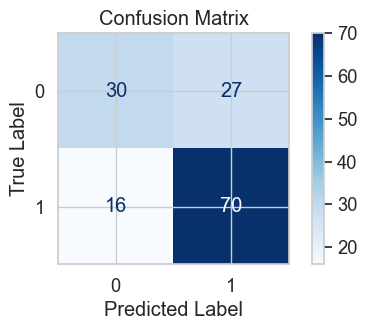

In [63]:
cnf_matrix = confusion_matrix(y_test, y_pred, labels=lr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix, display_labels=lr.classes_)

fig, ax = plt.subplots(figsize=(6, 3))
disp.plot(cmap='Blues', ax=ax, values_format='.4g')

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.show()

<h4 class="alert alert-danger" style="font-size:15px;  line-height:1.5;font-family: 'Courier New', Courier, monospace;">  Calculating the Accuracy, Precision, Recall, F1 and ROC for the Logistic Regression Model

In [64]:
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, y_pred, average='macro')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred, average='macro')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred, average='macro')
print('F1 score: %f' % f1)

# We have a binary classification model 'lr' and test data 'X_test' and 'y_test'
# We used probability labels (0 or 1) based on a threshold (e.g., 0.5)
y_pred_prob = lr.predict_proba(X_test)[:, 1]  # Probability of class 1
auc = roc_auc_score(y_test, y_pred_prob)

print('ROC AUC: %f' % auc)
matrix = confusion_matrix(y_test, y_pred)
print(matrix)

Accuracy: 0.699301
Precision: 0.686912
Recall: 0.670135
F1 score: 0.673776
ROC AUC: 0.743166
[[30 27]
 [16 70]]


<h4 class="alert alert-danger" style="font-size:15px;  line-height:1.5;font-family: 'Georgia', serif;">
Model #2 : K Nearest Neighbor (KNN)

<div class="alert alert-info" style="color:#000; font-size:15px;  line-height:1.5;font-family: 'Georgia', serif;">
K-Nearest Neighbors (KNN) is like asking your neighbors for advice; it looks at the closest people's opinions to make a decision. In the world of binary classification, it helps decide if something belongs to one of two groups, like yes or no. It counts how many neighbors from each group are nearby, and whatever group has more neighbors, that's the decision it makes. The idea is to keep things simple, yet it can be powerful when you want to figure out which group something belongs to based on the company it keeps.

<h4 class="alert alert-danger" style="font-size:15px;  line-height:1.5;font-family: 'Courier New', Courier, monospace;">  Fitting the KNN Model

In [65]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

for k in range(3,10):
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(X_train, y_train)
    y_preds = classifier.predict(X_test)
    print ("Accuracy for k =", k, "is:", accuracy_score(y_test, y_preds))
    print ("precision for k =", k, "is:", precision_score(y_test, y_preds))
    print ("recall for k =", k, "is:", recall_score(y_test, y_preds))
    print ("f1 for k =", k, "is:", f1_score(y_test, y_preds))
    print('\n')
    

Accuracy for k = 3 is: 0.6993006993006993
precision for k = 3 is: 0.7128712871287128
recall for k = 3 is: 0.8372093023255814
f1 for k = 3 is: 0.770053475935829


Accuracy for k = 4 is: 0.7062937062937062
precision for k = 4 is: 0.7558139534883721
recall for k = 4 is: 0.7558139534883721
f1 for k = 4 is: 0.755813953488372


Accuracy for k = 5 is: 0.6853146853146853
precision for k = 5 is: 0.7029702970297029
recall for k = 5 is: 0.8255813953488372
f1 for k = 5 is: 0.7593582887700535


Accuracy for k = 6 is: 0.7132867132867133
precision for k = 6 is: 0.7368421052631579
recall for k = 6 is: 0.813953488372093
f1 for k = 6 is: 0.7734806629834253


Accuracy for k = 7 is: 0.6853146853146853
precision for k = 7 is: 0.6952380952380952
recall for k = 7 is: 0.8488372093023255
f1 for k = 7 is: 0.7643979057591622


Accuracy for k = 8 is: 0.6853146853146853
precision for k = 8 is: 0.6990291262135923
recall for k = 8 is: 0.8372093023255814
f1 for k = 8 is: 0.761904761904762


Accuracy for k = 9 is: 0.6

<h4 class="alert alert-danger" style="font-size:15px;  line-height:1.5;font-family: 'Courier New', Courier, monospace;">  Predicting the test dataset

In [66]:
y_pred = classifier.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1])

<h4 class="alert alert-danger" style="font-size:15px;  line-height:1.5;font-family: 'Courier New', Courier, monospace;">  Create Confusion matrix - KNN

In [67]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[18, 39],
       [14, 72]], dtype=int64)

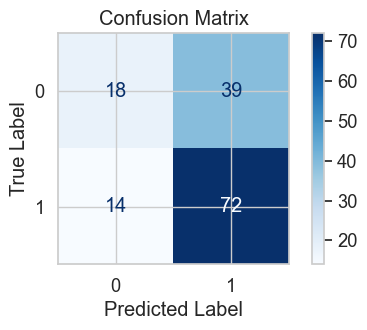

In [68]:
# cnf_matrix=confusion_matrix(y_test,y_pred,labels=classifier.classes_)
# disp=ConfusionMatrixDisplay(confusion_matrix=cnf_matrix)
# disp.plot()
# plt.show()
cnf_matrix = confusion_matrix(y_test, y_pred, labels=classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix, display_labels=classifier.classes_)

fig, ax = plt.subplots(figsize=(6, 3))
disp.plot(cmap='Blues', ax=ax, values_format='.4g')

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.show()

<h4 class="alert alert-danger" style="font-size:15px;  line-height:1.5;font-family: 'Courier New', Courier, monospace;">  Calculating the Accuracy, Precision, Recall, F1 and ROC for the KNN Model

In [69]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, y_pred , average='macro')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred , average='macro')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred , average='macro')
print('F1 score: %f' % f1)

# ROC AUC Use probability estimates for class 1
y_pred_prob = classifier.predict_proba(X_test)[:, 1]

# Calculate the ROC AUC score
auc = roc_auc_score(y_test, y_pred_prob)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_test, y_pred)
print(matrix)

Accuracy: 0.629371
Precision: 0.605574
Recall: 0.576499
F1 score: 0.567729
ROC AUC: 0.737658
[[18 39]
 [14 72]]


<h4 class="alert alert-danger" style="font-size:15px;  line-height:1.5;font-family: 'Georgia', serif;">
Model #3: Desicion Tree

<div class="alert alert-info" style="color:#000; font-size:15px;  line-height:1.5;font-family: 'Georgia', serif;">
A Decision Tree is a tool used in decision-making that mimics how we make choices in everyday life. Imagine you're faced with a series of questions about a situation, and each answer leads you to another question until you arrive at a decision. This is how a Decision Tree works; it asks questions about data and uses the answers to guide you to a conclusion. The questions are simple, like "Is it sunny today?" or "Is the price below $20?" The goal is to make the best choice based on those questions. It's like a flowchart that helps you decide what to do by following a path that makes the most sense, and it's often used in business, medicine, and many other fields to help with complex decisions.

<h4 class="alert alert-danger" style="font-size:15px;  line-height:1.5;font-family: 'Courier New', Courier, monospace;">  Fitting the Desicion Tree Model

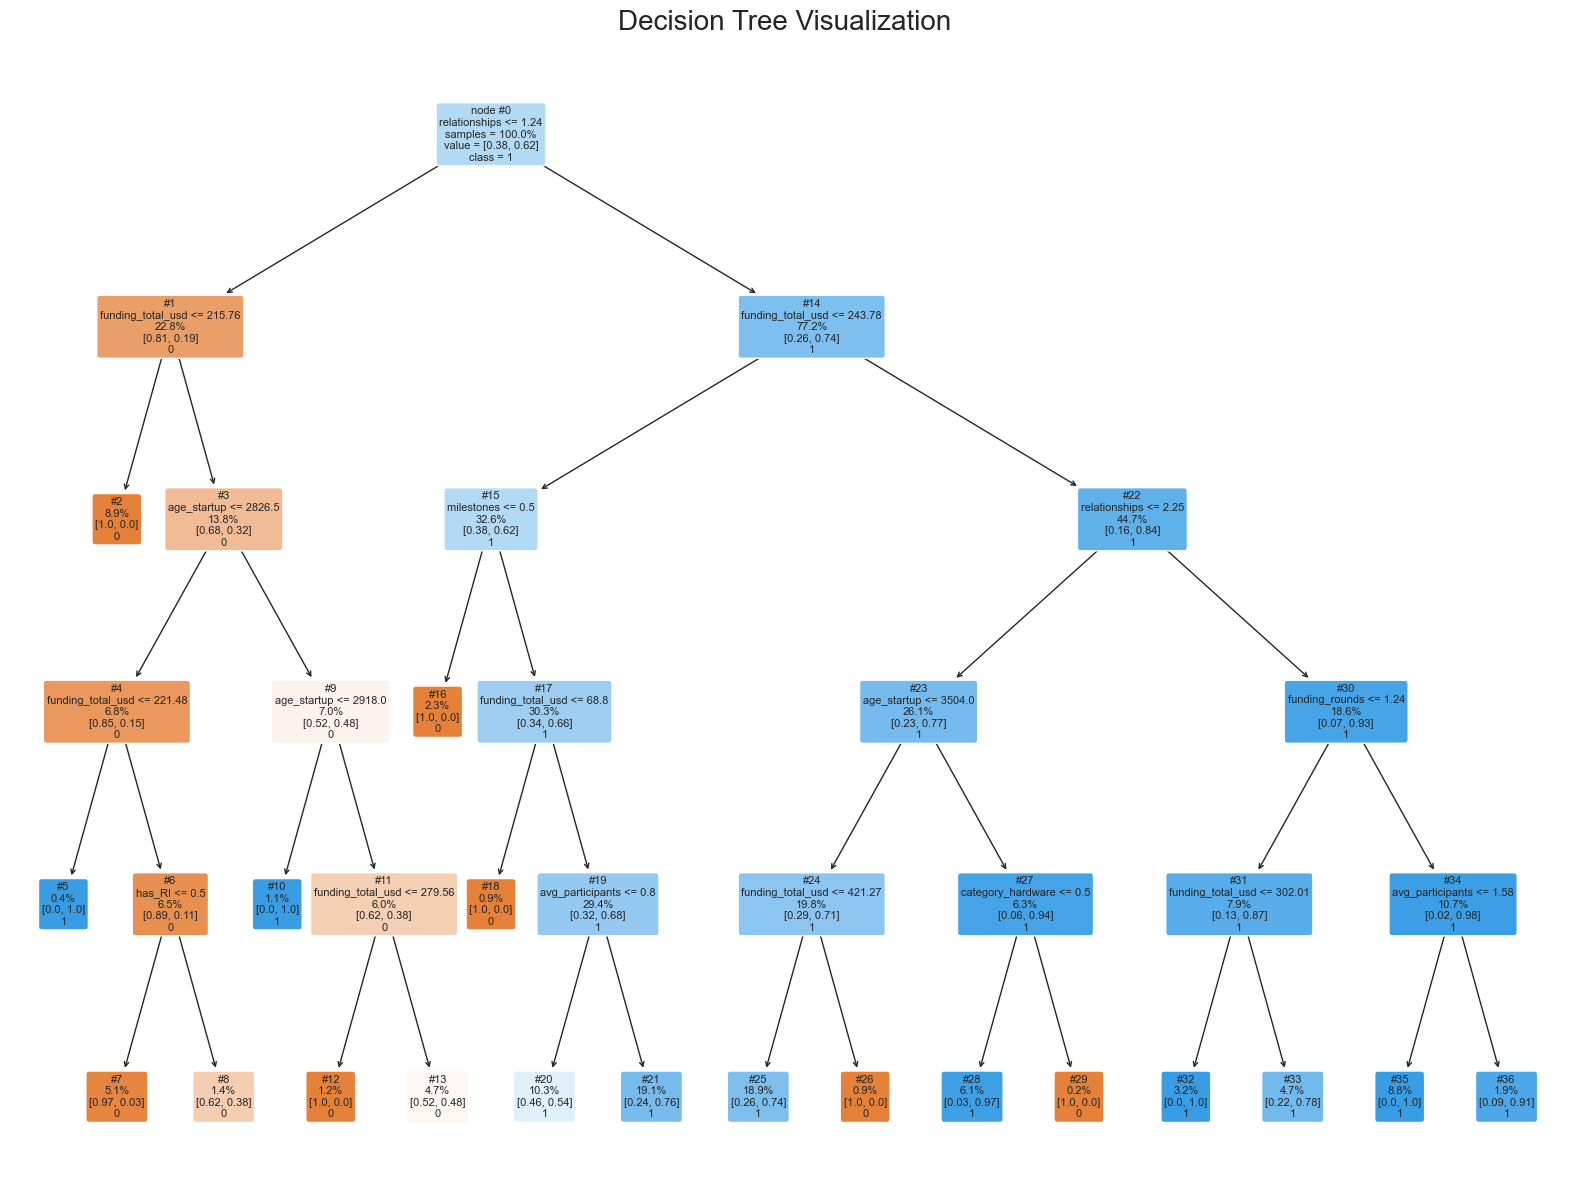

In [70]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from collections import Counter
np.random.seed(40)
classifer_dt = DecisionTreeClassifier(criterion='entropy',random_state=1,max_depth=5)
classifer_dt.fit(X_train, y_train)
y_pred = classifer_dt.predict(X_test)

plt.figure(figsize=(20, 15))
plot_tree(classifer_dt, filled=True, feature_names=X_train.columns, class_names=np.unique(y_train).astype(str), rounded=True, fontsize=8, proportion=True, impurity=False, precision=2, node_ids=True, label='root')
plt.title("Decision Tree Visualization", fontsize=20)
plt.show()


<h4 class="alert alert-danger" style="font-size:15px;  line-height:1.5;font-family: 'Courier New', Courier, monospace;">  Predicting the test dataset

In [71]:
y_pred = classifer_dt.predict(X_test)
y_pred

array([1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1])

<h4 class="alert alert-danger" style="font-size:15px;  line-height:1.5;font-family: 'Courier New', Courier, monospace;">  Create Confusion matrix - Desicion Tree

In [72]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[30, 27],
       [ 9, 77]], dtype=int64)

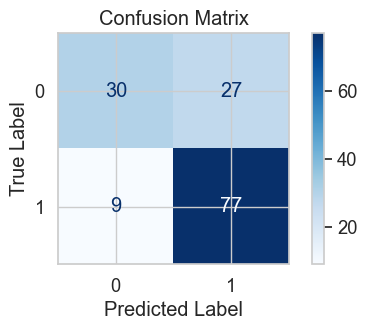

In [73]:
# cnf_matrix=confusion_matrix(y_test,y_pred,labels=classifer_dt.classes_)
# disp=ConfusionMatrixDisplay(confusion_matrix=cnf_matrix)
# disp.plot()
# plt.show()
cnf_matrix = confusion_matrix(y_test, y_pred, labels=classifer_dt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix, display_labels=classifer_dt.classes_)

fig, ax = plt.subplots(figsize=(6, 3))
disp.plot(cmap='Blues', ax=ax, values_format='.4g')

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.show()

<h4 class="alert alert-danger" style="font-size:15px;  line-height:1.5;font-family: 'Courier New', Courier, monospace;">  Calculating the Accuracy, Precision, Recall, F1 and ROC for the Desicion Tree Model

In [74]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, y_pred, average='macro')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred, average='macro')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred, average='macro')
print('F1 score: %f' % f1)
y_pred_prob = classifer_dt.predict_proba(X_test)[:, 1] 
# Calculate the ROC AUC score
auc = roc_auc_score(y_test, y_pred_prob)


print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_test, y_pred)

Accuracy: 0.748252
Precision: 0.754808
Recall: 0.710832
F1 score: 0.717763
ROC AUC: 0.781110


<h4 class="alert alert-danger" style="font-size:15px;  line-height:1.5;font-family: 'Georgia', serif;">
Model #4 : Random Forest

<div class="alert alert-info" style="color:#000; font-size:15px;  line-height:1.5;font-family: 'Georgia', serif;">
A Random Forest is an ensemble learning method that builds multiple decision trees during training and merges their predictions to improve accuracy and reduce overfitting. Similar to a Decision Tree, it combines the simplicity of asking questions about data with the collective wisdom of multiple trees, each providing its perspective, to arrive at a more robust and accurate conclusion, making it a versatile tool across various domains, including business and medicine, for complex decision-making tasks.

In [75]:
from sklearn.ensemble import RandomForestClassifier
#Fitting the model
forest = RandomForestClassifier(n_estimators = 53)
forest.fit(X_train, y_train)

# Predicting the Test set results
y_pred = forest.predict(X_test)
y_pred

array([1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1])

In [76]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[39, 18],
       [ 9, 77]], dtype=int64)

<h4 class="alert alert-danger" style="font-size:15px;  line-height:1.5;font-family: 'Courier New', Courier, monospace;">   Confusion Matrix for the Random Forest output

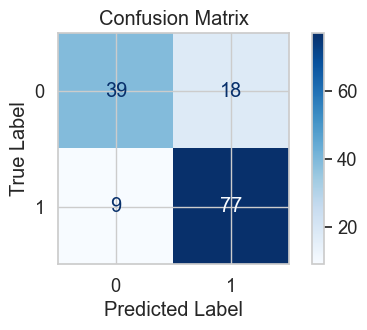

In [77]:
cnf_matrix = confusion_matrix(y_test, y_pred, labels=forest.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix, display_labels=forest.classes_)

fig, ax = plt.subplots(figsize=(6, 3))
disp.plot(cmap='Blues', ax=ax, values_format='.4g')

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.show()

<h4 class="alert alert-danger" style="font-size:15px;  line-height:1.5;font-family: 'Courier New', Courier, monospace;">  Calculating the Accuracy, Precision , Recall, F1 and ROC AUC 

In [78]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, y_pred, average='macro')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred, average='macro')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred, average='macro')
print('F1 score: %f' % f1)
y_pred_prob = classifer_dt.predict_proba(X_test)[:, 1] 
# Calculate the ROC AUC score
auc = roc_auc_score(y_test, y_pred_prob)


print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_test, y_pred)

Accuracy: 0.811189
Precision: 0.811513
Recall: 0.789780
F1 score: 0.796843
ROC AUC: 0.781110


 <h2 class="alert alert-success"  style="color:#000; font-family: 'Courier New', Courier, monospace;">8. MODEL EVALUATION</h2>

<div class="alert alert-info" style="color:#000; font-size:15px;  line-height:1.5;font-family: 'Georgia', serif;">
Model evaluation is the process of assessing a machine learning model's performance and effectiveness in making predictions on unseen data, typically involving metrics such as accuracy, precision, recall, and F1 score.

In [79]:
names = ["Logistic Regression", "K Nearest_Neighbors", "Decision Tree","Random Forest"]

classifiers = [LogisticRegression(fit_intercept = False, solver='lbfgs', max_iter=10000),
               KNeighborsClassifier(n_neighbors = 5),
               DecisionTreeClassifier(criterion='entropy',random_state=2,max_depth=10),
              RandomForestClassifier(n_estimators = 53)]

In [80]:
model_cols = []
df=pd.DataFrame(columns=model_cols)
index=0

In [81]:
from sklearn.preprocessing import label_binarize
# Convert the target variable into a binary indicator matrix
y_test_bin = label_binarize(y_test, classes=[0, 1])


# To display all the scores of each model
for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    df.loc[index, 'Classifiers'] = name
    df.loc[index, 'Accuracy'] = accuracy_score(y_test, clf.predict(X_test))
    df.loc[index, 'Precision'] = precision_score(y_test, clf.predict(X_test), average='macro')
    df.loc[index, 'Recall'] = recall_score(y_test, clf.predict(X_test), average='macro')
    df.loc[index, 'F1'] = f1_score(y_test, clf.predict(X_test), average='macro')
    df.loc[index, 'ROC AUC'] = roc_auc_score(y_test_bin, clf.predict_proba(X_test)[:, 1], multi_class='ovr')
    index += 1

df = df.sort_values(by=['Accuracy'], ascending=False)
df = df.reset_index(drop=True)
df

,Classifiers,Accuracy,Precision,Recall,F1,ROC AUC
0,Random Forest,0.811189,0.808602,0.792738,0.798413,0.849959
1,Decision Tree,0.748252,0.738811,0.728580,0.732210,0.779070
2,Logistic Regression,0.720280,0.711791,0.690534,0.695226,0.758262
3,K Nearest_Neighbors,0.685315,0.672914,0.649633,0.652406,0.719808


<div class="alert alert-warning" style="color:#000; font-size:15px;  line-height:1.5;font-family: 'Georgia', serif;">
<u>Interpretation</u>:<br>
Comparing the metrics and performance of all the models above we can say that "Random Forest" is noticed to be the best performing model

<h4 class="alert alert-danger" style="font-size:15px;  line-height:1.5;font-family: 'Georgia', serif;">
Visualizing the performance of different models

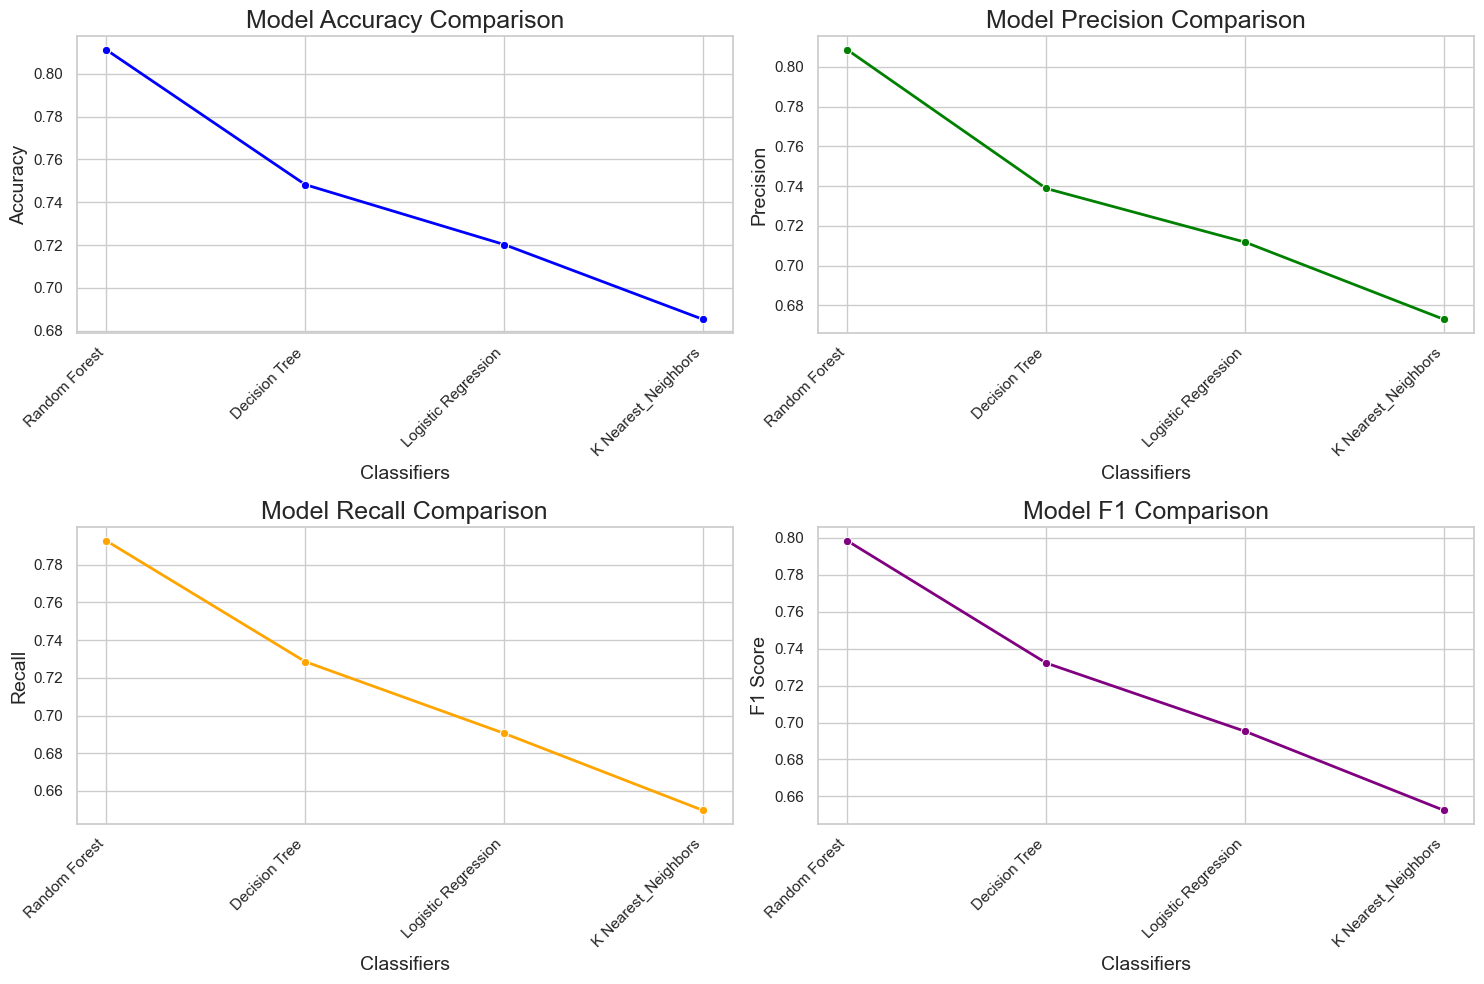

In [82]:
sns.set_theme(style="whitegrid", palette="husl")

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.lineplot(x='Classifiers', y='Accuracy', data=df, marker='o', linewidth=2, color='blue')
plt.title('Model Accuracy Comparison', fontsize=18)
plt.xlabel('Classifiers', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.xticks(rotation=45, ha='right')


plt.subplot(2, 2, 2)
sns.lineplot(x='Classifiers', y='Precision', data=df, marker='o', linewidth=2, color='green')
plt.title('Model Precision Comparison', fontsize=18)
plt.xlabel('Classifiers', fontsize=14)
plt.ylabel('Precision', fontsize=14)
plt.xticks(rotation=45, ha='right')


plt.subplot(2, 2, 3)
sns.lineplot(x='Classifiers', y='Recall', data=df, marker='o', linewidth=2, color='orange')
plt.title('Model Recall Comparison', fontsize=18)
plt.xlabel('Classifiers', fontsize=14)
plt.ylabel('Recall', fontsize=14)
plt.xticks(rotation=45, ha='right')


plt.subplot(2, 2, 4)
sns.lineplot(x='Classifiers', y='F1', data=df, marker='o', linewidth=2, color='purple')
plt.title('Model F1 Comparison', fontsize=18)
plt.xlabel('Classifiers', fontsize=14)
plt.ylabel('F1 Score', fontsize=14)
plt.xticks(rotation=45, ha='right')

# Adjust layout
plt.tight_layout()
plt.show()


<div class="alert alert-warning" style="color:#000; font-size:15px;  line-height:1.5;font-family: 'Georgia', serif;">
<u>Interpretation</u>:<br>
From the above graphs we can see that "Random Forest" is the best performing model on all the metrics.

<h2 class="alert alert-success"  style="color:#000; font-family: 'Courier New', Courier, monospace;">9. MODEL ASSESMENT</h2>

<div class="alert alert-info" style="color:#000; font-size:15px;  line-height:1.5;font-family: 'Georgia', serif;">
Model assessment using the ROC curve involves visualizing and analyzing the trade-off between true positive rate and false positive rate, providing a comprehensive evaluation of a classifier's performance across various threshold settings. The ROC curve serves as a valuable tool in quantifying and comparing the discriminatory power of classification models, particularly in scenarios where balancing sensitivity and specificity is crucial.

In [83]:
lr.fit(X_train, y_train)
classifier.fit(X_train, y_train)
classifer_dt.fit(X_train, y_train)
forest.fit(X_train, y_train)
# predict probabilities
pred_prob1 = lr.predict_proba(X_test)
pred_prob2 = classifier.predict_proba(X_test)
pred_prob3 = classifer_dt.predict_proba(X_test)
pred_prob4 = forest.predict_proba(X_test)

from sklearn.metrics import roc_curve# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)# roc curve for tpr = fpr
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob3[:,1], pos_label=1)# roc curve for tpr = fpr
fpr4, tpr4, thresh4 = roc_curve(y_test, pred_prob4[:,1], pos_label=1)# roc curve for tpr = fpr
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

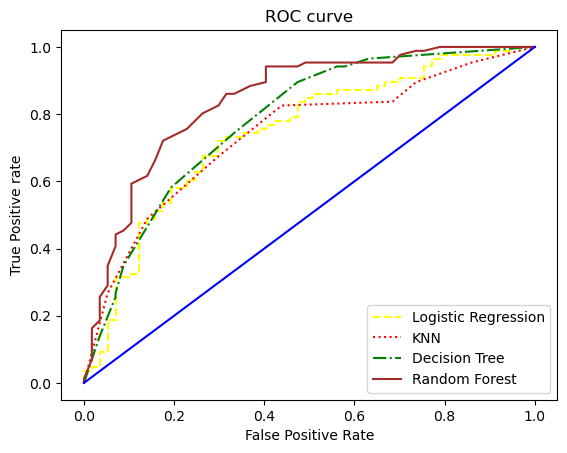

In [84]:

plt.style.use('default')# plot roc curves
plt.grid(False)
plt.plot(fpr1, tpr1, linestyle='--',color='Yellow', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle=':',color='red', label='KNN')
plt.plot(fpr3, tpr3, linestyle='-.',color='green', label='Decision Tree')
plt.plot(fpr4, tpr4, linestyle='-',color='brown', label='Random Forest')
plt.plot(p_fpr, p_tpr, linestyle='-', color='blue')

plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')

# y label
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

<div class="alert alert-warning" style="color:#000; font-size:15px;  line-height:1.5;font-family: 'Georgia', serif;">
<u>Interpretation</u>:<br>
   Upon analyzing the ROC Curves presented above, it is evident that the Random Forest model exhibits the superior performance, leading us to choose it as our predictive model for further analysis and decision-making.

<h2 class="alert alert-success"  style="color:#000; font-family: 'Courier New', Courier, monospace;"> 10. Predicting the class of new records

<div class="alert alert-info" style="color:#000; font-size:15px;  line-height:1.5;font-family: 'Georgia', serif;">
Employing the chosen model, the Random Forest, our objective is to predict outcomes for new records based on the learned patterns and features identified during the training phase.

In [85]:
new_records = pd.read_csv('test_data.csv', encoding = 'utf8')
new_records

,relationships,funding_rounds,funding_total_usd,milestones,avg_participants,is_top500,has_RI,age_startup,state_MA,city_Los Angeles,city_San Francisco,category_enterprise,category_hardware,category_other
0,1.609438,0.693147,310.894672,1.000000,1.098612,1,0,3569,0,0,0,0,0,0
1,1.098612,1.386294,322.320401,1.000000,0.693147,0,0,1743,0,0,0,0,0,0
2,2.197225,1.098612,228.328210,1.732051,0.916291,0,0,3934,0,0,0,0,0,0
3,2.079442,0.693147,160.911969,1.414214,0.693147,1,1,1012,0,0,0,1,0,0
4,1.609438,1.098612,286.918880,1.414214,1.098612,0,0,1957,0,0,0,0,0,0
5,2.079442,1.386294,420.213275,2.236068,1.609438,1,0,2839,0,0,0,0,0,0
6,1.609438,1.098612,301.630934,1.732051,1.098612,1,0,2224,0,0,0,0,0,0
7,0.693147,1.386294,324.402776,1.000000,0.847284,1,1,3569,0,0,0,0,0,0
8,1.386294,0.693147,147.681942,0.000000,0.693147,1,0,2191,0,1,0,0,0,0
9,1.386294,1.098612,178.945549,1.414214,1.791759,1,1,1103,0,0,0,0,0,0


In [86]:
#Predicting
model = forest.predict(new_records)
model

array([1, 0, 1, 1, 1, 1, 1, 1, 0, 1])

In [87]:
new_records['Status'] = model
model

array([1, 0, 1, 1, 1, 1, 1, 1, 0, 1])

In [90]:
new_records

,relationships,funding_rounds,funding_total_usd,milestones,avg_participants,is_top500,has_RI,age_startup,state_MA,city_Los Angeles,city_San Francisco,category_enterprise,category_hardware,category_other,Status
0,1.609438,0.693147,310.894672,1.000000,1.098612,1,0,3569,0,0,0,0,0,0,1
1,1.098612,1.386294,322.320401,1.000000,0.693147,0,0,1743,0,0,0,0,0,0,0
2,2.197225,1.098612,228.328210,1.732051,0.916291,0,0,3934,0,0,0,0,0,0,1
3,2.079442,0.693147,160.911969,1.414214,0.693147,1,1,1012,0,0,0,1,0,0,1
4,1.609438,1.098612,286.918880,1.414214,1.098612,0,0,1957,0,0,0,0,0,0,1
5,2.079442,1.386294,420.213275,2.236068,1.609438,1,0,2839,0,0,0,0,0,0,1
6,1.609438,1.098612,301.630934,1.732051,1.098612,1,0,2224,0,0,0,0,0,0,1
7,0.693147,1.386294,324.402776,1.000000,0.847284,1,1,3569,0,0,0,0,0,0,1
8,1.386294,0.693147,147.681942,0.000000,0.693147,1,0,2191,0,1,0,0,0,0,0
9,1.386294,1.098612,178.945549,1.414214,1.791759,1,1,1103,0,0,0,0,0,0,1


<div class="alert alert-warning" style="color:#000; font-size:15px;  line-height:1.5;font-family: 'Georgia', serif;">
<u>Interpretation</u>:<br>
Assigning '0' for 'Closed' and '1' for 'Success,' the analysis indicates that the total funding received alone does not singularly determine the status; other features also contribute to influencing the outcome.

<h1 align="center"  style=" color:#000; background-color:#3498db; padding:20px; font-family: 'Courier New', Courier, monospace;"> CONCLUSION</h1>
<div class="alert alert-info" style="color:#000; font-size:15px;  line-height:1.5;font-family: 'Georgia', serif;">
By employing diverse techniques encompassing data understanding, cleaning, preparation, feature engineering, and modeling, our goal of predicting the status category (Success or Closed) for startups has been successfully achieved, incorporating financial gains and other relevant conditions.</div>